In [37]:
#importing the libraries
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
import os

In [38]:
#importing dataset
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [39]:
#finding the no. of expamples
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


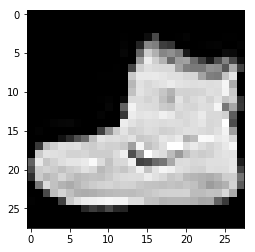

In [40]:
#printing an example
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [41]:

# Normalize this data [-1,1] 
x_train  = (x_train.astype('float32') - 127.5)/127.5
print(np.min(x_train))
print(np.max(x_train))

print(x_train.shape)

-1.0
1.0
(60000, 28, 28)


In [42]:
#fixing the no. of epochs,batch size and noise vector size
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(x_train.shape[0]/BATCH_SIZE) 
HALF_BATCH = 128
NOISE_DIM = 100 # Upsample into 784 Dim Vector
adam = Adam(lr=2e-4,beta_1=0.5)

In [55]:
#making our generator
#input is noise vector and output is 784 dim vector

generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 784)               803600    
Total para

In [56]:
# Downsampling 
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [57]:
#defining how to whole model will take input and output
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [58]:
#rehaping x_train to an array of array(size 60000x784)
x_train = x_train.reshape(-1,784)
print(x_train.shape)

(60000, 784)


In [59]:
#function to save and print image that is generated
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Epoch 1 Disc Loss 0.0035 Generator Loss 0.0110
Epoch 1 Disc Loss 0.0401 Generator Loss 0.0117
Epoch 1 Disc Loss 0.0419 Generator Loss 0.0757
Epoch 1 Disc Loss 0.0967 Generator Loss 0.0882
Epoch 1 Disc Loss 0.1200 Generator Loss 0.1014
Epoch 1 Disc Loss 0.1319 Generator Loss 0.1095
Epoch 1 Disc Loss 0.1334 Generator Loss 0.1306
Epoch 1 Disc Loss 0.1389 Generator Loss 0.1498
Epoch 1 Disc Loss 0.1418 Generator Loss 0.1663
Epoch 1 Disc Loss 0.1467 Generator Loss 0.1773
Epoch 1 Disc Loss 0.1487 Generator Loss 0.1917
Epoch 1 Disc Loss 0.1503 Generator Loss 0.2087
Epoch 1 Disc Loss 0.1525 Generator Loss 0.2273
Epoch 1 Disc Loss 0.1550 Generator Loss 0.2484
Epoch 1 Disc Loss 0.1564 Generator Loss 0.2695
Epoch 1 Disc Loss 0.1589 Generator Loss 0.2982
Epoch 1 Disc Loss 0.1602 Generator Loss 0.3171
Epoch 1 Disc Loss 0.1637 Generator Loss 0.3342
Epoch 1 Disc Loss 0.1648 Generator Loss 0.3489
Epoch 1 Disc Loss 0.1669 Generator Loss 0.3575
Epoch 1 Disc Loss 0.1691 Generator Loss 0.3645
Epoch 1 Disc 

Epoch 1 Disc Loss 0.5301 Generator Loss 1.1248
Epoch 1 Disc Loss 0.5326 Generator Loss 1.1301
Epoch 1 Disc Loss 0.5352 Generator Loss 1.1354
Epoch 1 Disc Loss 0.5379 Generator Loss 1.1406
Epoch 1 Disc Loss 0.5404 Generator Loss 1.1460
Epoch 1 Disc Loss 0.5429 Generator Loss 1.1512
Epoch 1 Disc Loss 0.5455 Generator Loss 1.1567
Epoch 1 Disc Loss 0.5480 Generator Loss 1.1621
Epoch 1 Disc Loss 0.5504 Generator Loss 1.1676
Epoch 1 Disc Loss 0.5529 Generator Loss 1.1732
Epoch 1 Disc Loss 0.5552 Generator Loss 1.1788
Epoch 1 Disc Loss 0.5576 Generator Loss 1.1842
Epoch 1 Disc Loss 0.5598 Generator Loss 1.1900
Epoch 1 Disc Loss 0.5622 Generator Loss 1.1958
Epoch 1 Disc Loss 0.5646 Generator Loss 1.2013
Epoch 1 Disc Loss 0.5669 Generator Loss 1.2070
Epoch 1 Disc Loss 0.5693 Generator Loss 1.2127
Epoch 1 Disc Loss 0.5714 Generator Loss 1.2188
Epoch 1 Disc Loss 0.5738 Generator Loss 1.2246
Epoch 1 Disc Loss 0.5760 Generator Loss 1.2306
Epoch 1 Disc Loss 0.5784 Generator Loss 1.2367
Epoch 1 Disc 

Epoch 2 Disc Loss 0.2848 Generator Loss 0.6802
Epoch 2 Disc Loss 0.2871 Generator Loss 0.6863
Epoch 2 Disc Loss 0.2896 Generator Loss 0.6923
Epoch 2 Disc Loss 0.2921 Generator Loss 0.6983
Epoch 2 Disc Loss 0.2945 Generator Loss 0.7046
Epoch 2 Disc Loss 0.2969 Generator Loss 0.7109
Epoch 2 Disc Loss 0.2992 Generator Loss 0.7175
Epoch 2 Disc Loss 0.3016 Generator Loss 0.7241
Epoch 2 Disc Loss 0.3039 Generator Loss 0.7307
Epoch 2 Disc Loss 0.3064 Generator Loss 0.7371
Epoch 2 Disc Loss 0.3087 Generator Loss 0.7440
Epoch 2 Disc Loss 0.3111 Generator Loss 0.7508
Epoch 2 Disc Loss 0.3134 Generator Loss 0.7574
Epoch 2 Disc Loss 0.3157 Generator Loss 0.7643
Epoch 2 Disc Loss 0.3180 Generator Loss 0.7712
Epoch 2 Disc Loss 0.3203 Generator Loss 0.7782
Epoch 2 Disc Loss 0.3226 Generator Loss 0.7848
Epoch 2 Disc Loss 0.3249 Generator Loss 0.7914
Epoch 2 Disc Loss 0.3271 Generator Loss 0.7985
Epoch 2 Disc Loss 0.3295 Generator Loss 0.8052
Epoch 2 Disc Loss 0.3318 Generator Loss 0.8119
Epoch 2 Disc 

Epoch 3 Disc Loss 0.1446 Generator Loss 0.3120
Epoch 3 Disc Loss 0.1471 Generator Loss 0.3174
Epoch 3 Disc Loss 0.1497 Generator Loss 0.3229
Epoch 3 Disc Loss 0.1523 Generator Loss 0.3281
Epoch 3 Disc Loss 0.1549 Generator Loss 0.3330
Epoch 3 Disc Loss 0.1574 Generator Loss 0.3383
Epoch 3 Disc Loss 0.1599 Generator Loss 0.3438
Epoch 3 Disc Loss 0.1626 Generator Loss 0.3491
Epoch 3 Disc Loss 0.1651 Generator Loss 0.3544
Epoch 3 Disc Loss 0.1676 Generator Loss 0.3596
Epoch 3 Disc Loss 0.1702 Generator Loss 0.3650
Epoch 3 Disc Loss 0.1727 Generator Loss 0.3703
Epoch 3 Disc Loss 0.1753 Generator Loss 0.3758
Epoch 3 Disc Loss 0.1778 Generator Loss 0.3815
Epoch 3 Disc Loss 0.1802 Generator Loss 0.3871
Epoch 3 Disc Loss 0.1830 Generator Loss 0.3924
Epoch 3 Disc Loss 0.1855 Generator Loss 0.3978
Epoch 3 Disc Loss 0.1879 Generator Loss 0.4037
Epoch 3 Disc Loss 0.1905 Generator Loss 0.4093
Epoch 3 Disc Loss 0.1930 Generator Loss 0.4148
Epoch 3 Disc Loss 0.1953 Generator Loss 0.4204
Epoch 3 Disc 

Epoch 3 Disc Loss 0.6055 Generator Loss 1.2108
Epoch 3 Disc Loss 0.6081 Generator Loss 1.2155
Epoch 3 Disc Loss 0.6107 Generator Loss 1.2204
Epoch 4 Disc Loss 0.0026 Generator Loss 0.0051
Epoch 4 Disc Loss 0.0053 Generator Loss 0.0100
Epoch 4 Disc Loss 0.0079 Generator Loss 0.0150
Epoch 4 Disc Loss 0.0104 Generator Loss 0.0203
Epoch 4 Disc Loss 0.0130 Generator Loss 0.0254
Epoch 4 Disc Loss 0.0155 Generator Loss 0.0304
Epoch 4 Disc Loss 0.0181 Generator Loss 0.0354
Epoch 4 Disc Loss 0.0206 Generator Loss 0.0406
Epoch 4 Disc Loss 0.0230 Generator Loss 0.0458
Epoch 4 Disc Loss 0.0255 Generator Loss 0.0512
Epoch 4 Disc Loss 0.0279 Generator Loss 0.0566
Epoch 4 Disc Loss 0.0305 Generator Loss 0.0617
Epoch 4 Disc Loss 0.0332 Generator Loss 0.0668
Epoch 4 Disc Loss 0.0358 Generator Loss 0.0717
Epoch 4 Disc Loss 0.0383 Generator Loss 0.0768
Epoch 4 Disc Loss 0.0408 Generator Loss 0.0819
Epoch 4 Disc Loss 0.0434 Generator Loss 0.0870
Epoch 4 Disc Loss 0.0459 Generator Loss 0.0922
Epoch 4 Disc 

Epoch 4 Disc Loss 0.4502 Generator Loss 0.8741
Epoch 4 Disc Loss 0.4530 Generator Loss 0.8790
Epoch 4 Disc Loss 0.4556 Generator Loss 0.8839
Epoch 4 Disc Loss 0.4582 Generator Loss 0.8889
Epoch 4 Disc Loss 0.4609 Generator Loss 0.8938
Epoch 4 Disc Loss 0.4636 Generator Loss 0.8986
Epoch 4 Disc Loss 0.4664 Generator Loss 0.9035
Epoch 4 Disc Loss 0.4690 Generator Loss 0.9084
Epoch 4 Disc Loss 0.4718 Generator Loss 0.9134
Epoch 4 Disc Loss 0.4744 Generator Loss 0.9184
Epoch 4 Disc Loss 0.4771 Generator Loss 0.9234
Epoch 4 Disc Loss 0.4797 Generator Loss 0.9284
Epoch 4 Disc Loss 0.4822 Generator Loss 0.9336
Epoch 4 Disc Loss 0.4849 Generator Loss 0.9385
Epoch 4 Disc Loss 0.4876 Generator Loss 0.9436
Epoch 4 Disc Loss 0.4903 Generator Loss 0.9486
Epoch 4 Disc Loss 0.4931 Generator Loss 0.9538
Epoch 4 Disc Loss 0.4957 Generator Loss 0.9591
Epoch 4 Disc Loss 0.4984 Generator Loss 0.9642
Epoch 4 Disc Loss 0.5011 Generator Loss 0.9693
Epoch 4 Disc Loss 0.5039 Generator Loss 0.9744
Epoch 4 Disc 

Epoch 5 Disc Loss 0.3015 Generator Loss 0.5336
Epoch 5 Disc Loss 0.3043 Generator Loss 0.5383
Epoch 5 Disc Loss 0.3070 Generator Loss 0.5431
Epoch 5 Disc Loss 0.3095 Generator Loss 0.5479
Epoch 5 Disc Loss 0.3121 Generator Loss 0.5528
Epoch 5 Disc Loss 0.3147 Generator Loss 0.5575
Epoch 5 Disc Loss 0.3174 Generator Loss 0.5622
Epoch 5 Disc Loss 0.3201 Generator Loss 0.5670
Epoch 5 Disc Loss 0.3227 Generator Loss 0.5717
Epoch 5 Disc Loss 0.3256 Generator Loss 0.5763
Epoch 5 Disc Loss 0.3284 Generator Loss 0.5809
Epoch 5 Disc Loss 0.3311 Generator Loss 0.5856
Epoch 5 Disc Loss 0.3340 Generator Loss 0.5903
Epoch 5 Disc Loss 0.3367 Generator Loss 0.5950
Epoch 5 Disc Loss 0.3395 Generator Loss 0.5996
Epoch 5 Disc Loss 0.3423 Generator Loss 0.6042
Epoch 5 Disc Loss 0.3449 Generator Loss 0.6092
Epoch 5 Disc Loss 0.3477 Generator Loss 0.6140
Epoch 5 Disc Loss 0.3503 Generator Loss 0.6188
Epoch 5 Disc Loss 0.3530 Generator Loss 0.6236
Epoch 5 Disc Loss 0.3557 Generator Loss 0.6282
Epoch 5 Disc 

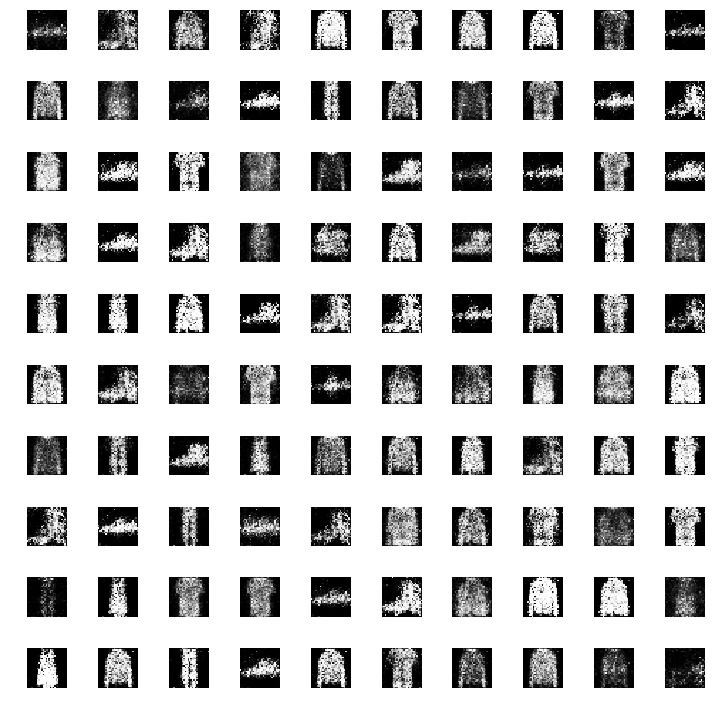

Epoch 6 Disc Loss 0.0027 Generator Loss 0.0047
Epoch 6 Disc Loss 0.0054 Generator Loss 0.0094
Epoch 6 Disc Loss 0.0080 Generator Loss 0.0141
Epoch 6 Disc Loss 0.0107 Generator Loss 0.0189
Epoch 6 Disc Loss 0.0133 Generator Loss 0.0237
Epoch 6 Disc Loss 0.0159 Generator Loss 0.0285
Epoch 6 Disc Loss 0.0186 Generator Loss 0.0332
Epoch 6 Disc Loss 0.0214 Generator Loss 0.0379
Epoch 6 Disc Loss 0.0241 Generator Loss 0.0427
Epoch 6 Disc Loss 0.0268 Generator Loss 0.0473
Epoch 6 Disc Loss 0.0296 Generator Loss 0.0520
Epoch 6 Disc Loss 0.0324 Generator Loss 0.0568
Epoch 6 Disc Loss 0.0353 Generator Loss 0.0613
Epoch 6 Disc Loss 0.0381 Generator Loss 0.0659
Epoch 6 Disc Loss 0.0408 Generator Loss 0.0705
Epoch 6 Disc Loss 0.0435 Generator Loss 0.0750
Epoch 6 Disc Loss 0.0463 Generator Loss 0.0796
Epoch 6 Disc Loss 0.0490 Generator Loss 0.0842
Epoch 6 Disc Loss 0.0517 Generator Loss 0.0889
Epoch 6 Disc Loss 0.0544 Generator Loss 0.0937
Epoch 6 Disc Loss 0.0571 Generator Loss 0.0985
Epoch 6 Disc 

Epoch 6 Disc Loss 0.4881 Generator Loss 0.7982
Epoch 6 Disc Loss 0.4908 Generator Loss 0.8028
Epoch 6 Disc Loss 0.4936 Generator Loss 0.8072
Epoch 6 Disc Loss 0.4965 Generator Loss 0.8116
Epoch 6 Disc Loss 0.4993 Generator Loss 0.8158
Epoch 6 Disc Loss 0.5021 Generator Loss 0.8202
Epoch 6 Disc Loss 0.5050 Generator Loss 0.8247
Epoch 6 Disc Loss 0.5078 Generator Loss 0.8291
Epoch 6 Disc Loss 0.5106 Generator Loss 0.8335
Epoch 6 Disc Loss 0.5134 Generator Loss 0.8380
Epoch 6 Disc Loss 0.5164 Generator Loss 0.8422
Epoch 6 Disc Loss 0.5191 Generator Loss 0.8463
Epoch 6 Disc Loss 0.5221 Generator Loss 0.8504
Epoch 6 Disc Loss 0.5250 Generator Loss 0.8545
Epoch 6 Disc Loss 0.5279 Generator Loss 0.8589
Epoch 6 Disc Loss 0.5307 Generator Loss 0.8632
Epoch 6 Disc Loss 0.5335 Generator Loss 0.8677
Epoch 6 Disc Loss 0.5364 Generator Loss 0.8721
Epoch 6 Disc Loss 0.5392 Generator Loss 0.8765
Epoch 6 Disc Loss 0.5419 Generator Loss 0.8809
Epoch 6 Disc Loss 0.5448 Generator Loss 0.8853
Epoch 6 Disc 

Epoch 7 Disc Loss 0.3294 Generator Loss 0.5037
Epoch 7 Disc Loss 0.3322 Generator Loss 0.5080
Epoch 7 Disc Loss 0.3350 Generator Loss 0.5122
Epoch 7 Disc Loss 0.3378 Generator Loss 0.5164
Epoch 7 Disc Loss 0.3407 Generator Loss 0.5206
Epoch 7 Disc Loss 0.3434 Generator Loss 0.5248
Epoch 7 Disc Loss 0.3463 Generator Loss 0.5291
Epoch 7 Disc Loss 0.3491 Generator Loss 0.5334
Epoch 7 Disc Loss 0.3519 Generator Loss 0.5378
Epoch 7 Disc Loss 0.3548 Generator Loss 0.5422
Epoch 7 Disc Loss 0.3576 Generator Loss 0.5465
Epoch 7 Disc Loss 0.3604 Generator Loss 0.5508
Epoch 7 Disc Loss 0.3632 Generator Loss 0.5550
Epoch 7 Disc Loss 0.3660 Generator Loss 0.5592
Epoch 7 Disc Loss 0.3688 Generator Loss 0.5634
Epoch 7 Disc Loss 0.3717 Generator Loss 0.5675
Epoch 7 Disc Loss 0.3745 Generator Loss 0.5718
Epoch 7 Disc Loss 0.3773 Generator Loss 0.5761
Epoch 7 Disc Loss 0.3801 Generator Loss 0.5803
Epoch 7 Disc Loss 0.3829 Generator Loss 0.5846
Epoch 7 Disc Loss 0.3857 Generator Loss 0.5889
Epoch 7 Disc 

Epoch 8 Disc Loss 0.1657 Generator Loss 0.2549
Epoch 8 Disc Loss 0.1685 Generator Loss 0.2592
Epoch 8 Disc Loss 0.1712 Generator Loss 0.2634
Epoch 8 Disc Loss 0.1741 Generator Loss 0.2676
Epoch 8 Disc Loss 0.1768 Generator Loss 0.2718
Epoch 8 Disc Loss 0.1796 Generator Loss 0.2762
Epoch 8 Disc Loss 0.1824 Generator Loss 0.2805
Epoch 8 Disc Loss 0.1852 Generator Loss 0.2848
Epoch 8 Disc Loss 0.1880 Generator Loss 0.2891
Epoch 8 Disc Loss 0.1909 Generator Loss 0.2934
Epoch 8 Disc Loss 0.1936 Generator Loss 0.2976
Epoch 8 Disc Loss 0.1964 Generator Loss 0.3019
Epoch 8 Disc Loss 0.1991 Generator Loss 0.3062
Epoch 8 Disc Loss 0.2020 Generator Loss 0.3106
Epoch 8 Disc Loss 0.2049 Generator Loss 0.3149
Epoch 8 Disc Loss 0.2077 Generator Loss 0.3192
Epoch 8 Disc Loss 0.2104 Generator Loss 0.3235
Epoch 8 Disc Loss 0.2133 Generator Loss 0.3278
Epoch 8 Disc Loss 0.2161 Generator Loss 0.3322
Epoch 8 Disc Loss 0.2190 Generator Loss 0.3366
Epoch 8 Disc Loss 0.2217 Generator Loss 0.3409
Epoch 8 Disc 

Epoch 9 Disc Loss 0.0028 Generator Loss 0.0043
Epoch 9 Disc Loss 0.0057 Generator Loss 0.0086
Epoch 9 Disc Loss 0.0085 Generator Loss 0.0129
Epoch 9 Disc Loss 0.0114 Generator Loss 0.0173
Epoch 9 Disc Loss 0.0143 Generator Loss 0.0217
Epoch 9 Disc Loss 0.0169 Generator Loss 0.0261
Epoch 9 Disc Loss 0.0197 Generator Loss 0.0304
Epoch 9 Disc Loss 0.0225 Generator Loss 0.0347
Epoch 9 Disc Loss 0.0254 Generator Loss 0.0390
Epoch 9 Disc Loss 0.0282 Generator Loss 0.0433
Epoch 9 Disc Loss 0.0310 Generator Loss 0.0477
Epoch 9 Disc Loss 0.0338 Generator Loss 0.0519
Epoch 9 Disc Loss 0.0366 Generator Loss 0.0562
Epoch 9 Disc Loss 0.0395 Generator Loss 0.0606
Epoch 9 Disc Loss 0.0423 Generator Loss 0.0649
Epoch 9 Disc Loss 0.0451 Generator Loss 0.0694
Epoch 9 Disc Loss 0.0478 Generator Loss 0.0739
Epoch 9 Disc Loss 0.0507 Generator Loss 0.0781
Epoch 9 Disc Loss 0.0535 Generator Loss 0.0825
Epoch 9 Disc Loss 0.0564 Generator Loss 0.0868
Epoch 9 Disc Loss 0.0592 Generator Loss 0.0910
Epoch 9 Disc 

Epoch 9 Disc Loss 0.4938 Generator Loss 0.7501
Epoch 9 Disc Loss 0.4965 Generator Loss 0.7544
Epoch 9 Disc Loss 0.4993 Generator Loss 0.7587
Epoch 9 Disc Loss 0.5021 Generator Loss 0.7629
Epoch 9 Disc Loss 0.5049 Generator Loss 0.7672
Epoch 9 Disc Loss 0.5078 Generator Loss 0.7715
Epoch 9 Disc Loss 0.5105 Generator Loss 0.7758
Epoch 9 Disc Loss 0.5132 Generator Loss 0.7800
Epoch 9 Disc Loss 0.5160 Generator Loss 0.7843
Epoch 9 Disc Loss 0.5188 Generator Loss 0.7886
Epoch 9 Disc Loss 0.5215 Generator Loss 0.7929
Epoch 9 Disc Loss 0.5243 Generator Loss 0.7972
Epoch 9 Disc Loss 0.5271 Generator Loss 0.8015
Epoch 9 Disc Loss 0.5299 Generator Loss 0.8058
Epoch 9 Disc Loss 0.5327 Generator Loss 0.8102
Epoch 9 Disc Loss 0.5353 Generator Loss 0.8146
Epoch 9 Disc Loss 0.5382 Generator Loss 0.8190
Epoch 9 Disc Loss 0.5409 Generator Loss 0.8232
Epoch 9 Disc Loss 0.5437 Generator Loss 0.8273
Epoch 9 Disc Loss 0.5466 Generator Loss 0.8315
Epoch 9 Disc Loss 0.5494 Generator Loss 0.8357
Epoch 9 Disc 

Epoch 10 Disc Loss 0.3184 Generator Loss 0.4886
Epoch 10 Disc Loss 0.3213 Generator Loss 0.4930
Epoch 10 Disc Loss 0.3242 Generator Loss 0.4971
Epoch 10 Disc Loss 0.3272 Generator Loss 0.5011
Epoch 10 Disc Loss 0.3300 Generator Loss 0.5052
Epoch 10 Disc Loss 0.3328 Generator Loss 0.5092
Epoch 10 Disc Loss 0.3358 Generator Loss 0.5133
Epoch 10 Disc Loss 0.3387 Generator Loss 0.5174
Epoch 10 Disc Loss 0.3416 Generator Loss 0.5217
Epoch 10 Disc Loss 0.3445 Generator Loss 0.5261
Epoch 10 Disc Loss 0.3474 Generator Loss 0.5304
Epoch 10 Disc Loss 0.3502 Generator Loss 0.5347
Epoch 10 Disc Loss 0.3531 Generator Loss 0.5390
Epoch 10 Disc Loss 0.3559 Generator Loss 0.5432
Epoch 10 Disc Loss 0.3588 Generator Loss 0.5474
Epoch 10 Disc Loss 0.3616 Generator Loss 0.5516
Epoch 10 Disc Loss 0.3645 Generator Loss 0.5559
Epoch 10 Disc Loss 0.3674 Generator Loss 0.5602
Epoch 10 Disc Loss 0.3702 Generator Loss 0.5646
Epoch 10 Disc Loss 0.3730 Generator Loss 0.5689
Epoch 10 Disc Loss 0.3758 Generator Loss

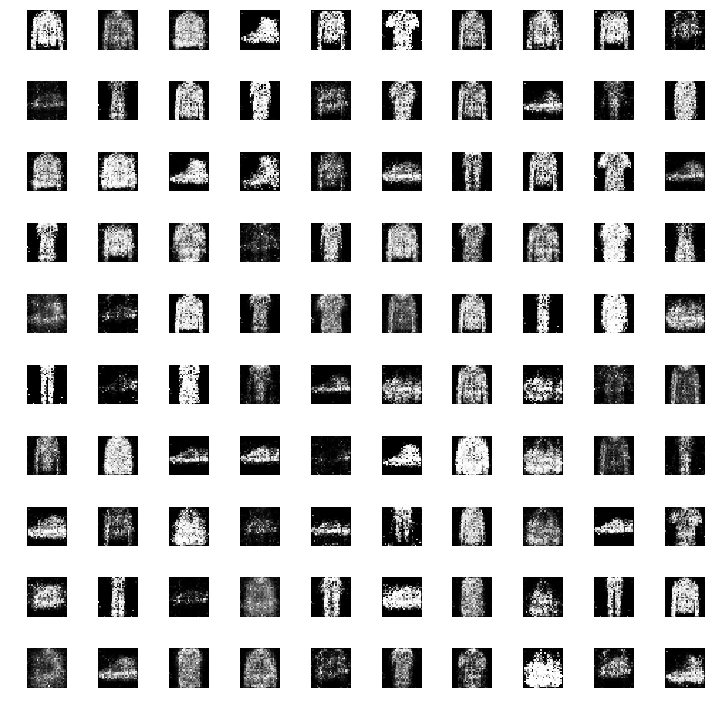

Epoch 11 Disc Loss 0.0030 Generator Loss 0.0044
Epoch 11 Disc Loss 0.0058 Generator Loss 0.0087
Epoch 11 Disc Loss 0.0087 Generator Loss 0.0130
Epoch 11 Disc Loss 0.0116 Generator Loss 0.0172
Epoch 11 Disc Loss 0.0144 Generator Loss 0.0215
Epoch 11 Disc Loss 0.0172 Generator Loss 0.0257
Epoch 11 Disc Loss 0.0200 Generator Loss 0.0302
Epoch 11 Disc Loss 0.0229 Generator Loss 0.0345
Epoch 11 Disc Loss 0.0256 Generator Loss 0.0388
Epoch 11 Disc Loss 0.0284 Generator Loss 0.0434
Epoch 11 Disc Loss 0.0312 Generator Loss 0.0480
Epoch 11 Disc Loss 0.0338 Generator Loss 0.0525
Epoch 11 Disc Loss 0.0366 Generator Loss 0.0571
Epoch 11 Disc Loss 0.0394 Generator Loss 0.0616
Epoch 11 Disc Loss 0.0422 Generator Loss 0.0661
Epoch 11 Disc Loss 0.0450 Generator Loss 0.0703
Epoch 11 Disc Loss 0.0479 Generator Loss 0.0746
Epoch 11 Disc Loss 0.0506 Generator Loss 0.0787
Epoch 11 Disc Loss 0.0534 Generator Loss 0.0830
Epoch 11 Disc Loss 0.0563 Generator Loss 0.0873
Epoch 11 Disc Loss 0.0591 Generator Loss

Epoch 11 Disc Loss 0.4873 Generator Loss 0.7448
Epoch 11 Disc Loss 0.4901 Generator Loss 0.7491
Epoch 11 Disc Loss 0.4928 Generator Loss 0.7535
Epoch 11 Disc Loss 0.4956 Generator Loss 0.7580
Epoch 11 Disc Loss 0.4983 Generator Loss 0.7623
Epoch 11 Disc Loss 0.5012 Generator Loss 0.7667
Epoch 11 Disc Loss 0.5039 Generator Loss 0.7712
Epoch 11 Disc Loss 0.5067 Generator Loss 0.7755
Epoch 11 Disc Loss 0.5096 Generator Loss 0.7798
Epoch 11 Disc Loss 0.5124 Generator Loss 0.7841
Epoch 11 Disc Loss 0.5152 Generator Loss 0.7885
Epoch 11 Disc Loss 0.5180 Generator Loss 0.7929
Epoch 11 Disc Loss 0.5207 Generator Loss 0.7972
Epoch 11 Disc Loss 0.5234 Generator Loss 0.8016
Epoch 11 Disc Loss 0.5263 Generator Loss 0.8060
Epoch 11 Disc Loss 0.5291 Generator Loss 0.8104
Epoch 11 Disc Loss 0.5320 Generator Loss 0.8148
Epoch 11 Disc Loss 0.5348 Generator Loss 0.8192
Epoch 11 Disc Loss 0.5377 Generator Loss 0.8235
Epoch 11 Disc Loss 0.5406 Generator Loss 0.8277
Epoch 11 Disc Loss 0.5435 Generator Loss

Epoch 12 Disc Loss 0.3125 Generator Loss 0.4772
Epoch 12 Disc Loss 0.3153 Generator Loss 0.4815
Epoch 12 Disc Loss 0.3181 Generator Loss 0.4859
Epoch 12 Disc Loss 0.3209 Generator Loss 0.4902
Epoch 12 Disc Loss 0.3238 Generator Loss 0.4945
Epoch 12 Disc Loss 0.3267 Generator Loss 0.4987
Epoch 12 Disc Loss 0.3295 Generator Loss 0.5030
Epoch 12 Disc Loss 0.3324 Generator Loss 0.5072
Epoch 12 Disc Loss 0.3354 Generator Loss 0.5116
Epoch 12 Disc Loss 0.3382 Generator Loss 0.5160
Epoch 12 Disc Loss 0.3412 Generator Loss 0.5204
Epoch 12 Disc Loss 0.3441 Generator Loss 0.5248
Epoch 12 Disc Loss 0.3470 Generator Loss 0.5291
Epoch 12 Disc Loss 0.3498 Generator Loss 0.5333
Epoch 12 Disc Loss 0.3527 Generator Loss 0.5375
Epoch 12 Disc Loss 0.3555 Generator Loss 0.5419
Epoch 12 Disc Loss 0.3583 Generator Loss 0.5462
Epoch 12 Disc Loss 0.3610 Generator Loss 0.5505
Epoch 12 Disc Loss 0.3639 Generator Loss 0.5548
Epoch 12 Disc Loss 0.3667 Generator Loss 0.5591
Epoch 12 Disc Loss 0.3695 Generator Loss

Epoch 13 Disc Loss 0.1378 Generator Loss 0.2131
Epoch 13 Disc Loss 0.1405 Generator Loss 0.2176
Epoch 13 Disc Loss 0.1433 Generator Loss 0.2219
Epoch 13 Disc Loss 0.1459 Generator Loss 0.2264
Epoch 13 Disc Loss 0.1486 Generator Loss 0.2307
Epoch 13 Disc Loss 0.1513 Generator Loss 0.2349
Epoch 13 Disc Loss 0.1541 Generator Loss 0.2392
Epoch 13 Disc Loss 0.1571 Generator Loss 0.2436
Epoch 13 Disc Loss 0.1600 Generator Loss 0.2481
Epoch 13 Disc Loss 0.1628 Generator Loss 0.2528
Epoch 13 Disc Loss 0.1656 Generator Loss 0.2574
Epoch 13 Disc Loss 0.1686 Generator Loss 0.2619
Epoch 13 Disc Loss 0.1714 Generator Loss 0.2662
Epoch 13 Disc Loss 0.1743 Generator Loss 0.2707
Epoch 13 Disc Loss 0.1773 Generator Loss 0.2751
Epoch 13 Disc Loss 0.1802 Generator Loss 0.2794
Epoch 13 Disc Loss 0.1831 Generator Loss 0.2836
Epoch 13 Disc Loss 0.1859 Generator Loss 0.2878
Epoch 13 Disc Loss 0.1887 Generator Loss 0.2920
Epoch 13 Disc Loss 0.1915 Generator Loss 0.2964
Epoch 13 Disc Loss 0.1943 Generator Loss

Epoch 13 Disc Loss 0.6194 Generator Loss 0.9519
Epoch 13 Disc Loss 0.6222 Generator Loss 0.9562
Epoch 13 Disc Loss 0.6249 Generator Loss 0.9605
Epoch 13 Disc Loss 0.6277 Generator Loss 0.9649
Epoch 13 Disc Loss 0.6305 Generator Loss 0.9691
Epoch 13 Disc Loss 0.6333 Generator Loss 0.9735
Epoch 13 Disc Loss 0.6362 Generator Loss 0.9778
Epoch 13 Disc Loss 0.6389 Generator Loss 0.9822
Epoch 13 Disc Loss 0.6418 Generator Loss 0.9864
Epoch 13 Disc Loss 0.6446 Generator Loss 0.9905
Epoch 13 Disc Loss 0.6474 Generator Loss 0.9946
Epoch 13 Disc Loss 0.6503 Generator Loss 0.9987
Epoch 13 Disc Loss 0.6532 Generator Loss 1.0028
Epoch 13 Disc Loss 0.6560 Generator Loss 1.0070
Epoch 13 Disc Loss 0.6588 Generator Loss 1.0113
Epoch 14 Disc Loss 0.0029 Generator Loss 0.0043
Epoch 14 Disc Loss 0.0057 Generator Loss 0.0085
Epoch 14 Disc Loss 0.0085 Generator Loss 0.0126
Epoch 14 Disc Loss 0.0114 Generator Loss 0.0168
Epoch 14 Disc Loss 0.0141 Generator Loss 0.0210
Epoch 14 Disc Loss 0.0169 Generator Loss

Epoch 14 Disc Loss 0.4432 Generator Loss 0.6647
Epoch 14 Disc Loss 0.4461 Generator Loss 0.6689
Epoch 14 Disc Loss 0.4491 Generator Loss 0.6731
Epoch 14 Disc Loss 0.4520 Generator Loss 0.6774
Epoch 14 Disc Loss 0.4549 Generator Loss 0.6816
Epoch 14 Disc Loss 0.4577 Generator Loss 0.6857
Epoch 14 Disc Loss 0.4606 Generator Loss 0.6900
Epoch 14 Disc Loss 0.4634 Generator Loss 0.6942
Epoch 14 Disc Loss 0.4662 Generator Loss 0.6984
Epoch 14 Disc Loss 0.4691 Generator Loss 0.7026
Epoch 14 Disc Loss 0.4718 Generator Loss 0.7069
Epoch 14 Disc Loss 0.4745 Generator Loss 0.7113
Epoch 14 Disc Loss 0.4771 Generator Loss 0.7157
Epoch 14 Disc Loss 0.4799 Generator Loss 0.7200
Epoch 14 Disc Loss 0.4827 Generator Loss 0.7242
Epoch 14 Disc Loss 0.4855 Generator Loss 0.7286
Epoch 14 Disc Loss 0.4884 Generator Loss 0.7329
Epoch 14 Disc Loss 0.4913 Generator Loss 0.7372
Epoch 14 Disc Loss 0.4941 Generator Loss 0.7417
Epoch 14 Disc Loss 0.4969 Generator Loss 0.7462
Epoch 14 Disc Loss 0.4998 Generator Loss

Epoch 15 Disc Loss 0.2679 Generator Loss 0.3884
Epoch 15 Disc Loss 0.2707 Generator Loss 0.3924
Epoch 15 Disc Loss 0.2736 Generator Loss 0.3965
Epoch 15 Disc Loss 0.2765 Generator Loss 0.4006
Epoch 15 Disc Loss 0.2794 Generator Loss 0.4046
Epoch 15 Disc Loss 0.2822 Generator Loss 0.4088
Epoch 15 Disc Loss 0.2851 Generator Loss 0.4129
Epoch 15 Disc Loss 0.2879 Generator Loss 0.4170
Epoch 15 Disc Loss 0.2909 Generator Loss 0.4210
Epoch 15 Disc Loss 0.2938 Generator Loss 0.4250
Epoch 15 Disc Loss 0.2967 Generator Loss 0.4290
Epoch 15 Disc Loss 0.2994 Generator Loss 0.4331
Epoch 15 Disc Loss 0.3023 Generator Loss 0.4373
Epoch 15 Disc Loss 0.3052 Generator Loss 0.4415
Epoch 15 Disc Loss 0.3081 Generator Loss 0.4457
Epoch 15 Disc Loss 0.3109 Generator Loss 0.4500
Epoch 15 Disc Loss 0.3138 Generator Loss 0.4541
Epoch 15 Disc Loss 0.3167 Generator Loss 0.4583
Epoch 15 Disc Loss 0.3196 Generator Loss 0.4625
Epoch 15 Disc Loss 0.3224 Generator Loss 0.4667
Epoch 15 Disc Loss 0.3253 Generator Loss

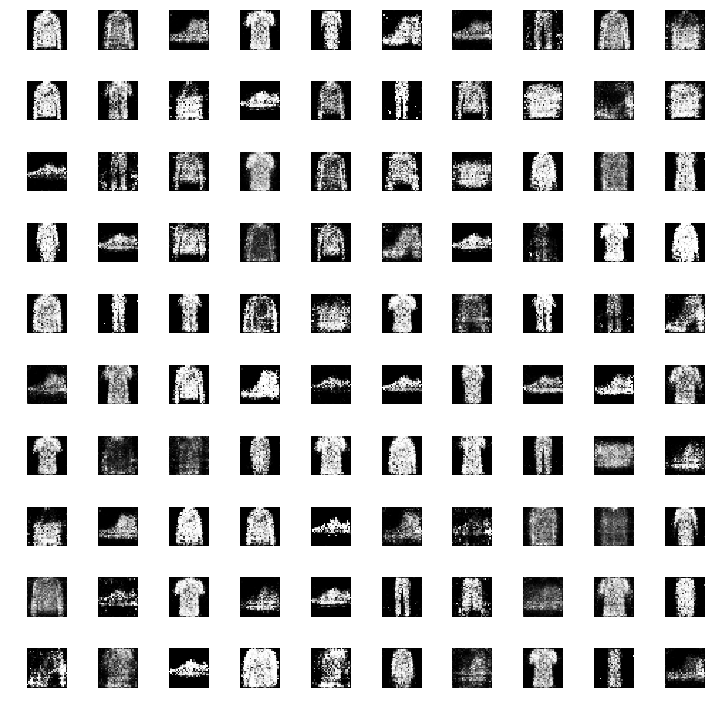

Epoch 16 Disc Loss 0.0028 Generator Loss 0.0042
Epoch 16 Disc Loss 0.0057 Generator Loss 0.0084
Epoch 16 Disc Loss 0.0086 Generator Loss 0.0125
Epoch 16 Disc Loss 0.0116 Generator Loss 0.0165
Epoch 16 Disc Loss 0.0145 Generator Loss 0.0206
Epoch 16 Disc Loss 0.0174 Generator Loss 0.0246
Epoch 16 Disc Loss 0.0202 Generator Loss 0.0287
Epoch 16 Disc Loss 0.0231 Generator Loss 0.0327
Epoch 16 Disc Loss 0.0261 Generator Loss 0.0369
Epoch 16 Disc Loss 0.0290 Generator Loss 0.0409
Epoch 16 Disc Loss 0.0319 Generator Loss 0.0451
Epoch 16 Disc Loss 0.0349 Generator Loss 0.0492
Epoch 16 Disc Loss 0.0377 Generator Loss 0.0535
Epoch 16 Disc Loss 0.0406 Generator Loss 0.0579
Epoch 16 Disc Loss 0.0435 Generator Loss 0.0621
Epoch 16 Disc Loss 0.0464 Generator Loss 0.0665
Epoch 16 Disc Loss 0.0493 Generator Loss 0.0707
Epoch 16 Disc Loss 0.0521 Generator Loss 0.0749
Epoch 16 Disc Loss 0.0550 Generator Loss 0.0790
Epoch 16 Disc Loss 0.0578 Generator Loss 0.0831
Epoch 16 Disc Loss 0.0607 Generator Loss

Epoch 16 Disc Loss 0.4926 Generator Loss 0.7091
Epoch 16 Disc Loss 0.4954 Generator Loss 0.7133
Epoch 16 Disc Loss 0.4982 Generator Loss 0.7176
Epoch 16 Disc Loss 0.5011 Generator Loss 0.7219
Epoch 16 Disc Loss 0.5040 Generator Loss 0.7260
Epoch 16 Disc Loss 0.5069 Generator Loss 0.7302
Epoch 16 Disc Loss 0.5098 Generator Loss 0.7346
Epoch 16 Disc Loss 0.5126 Generator Loss 0.7391
Epoch 16 Disc Loss 0.5154 Generator Loss 0.7435
Epoch 16 Disc Loss 0.5184 Generator Loss 0.7477
Epoch 16 Disc Loss 0.5214 Generator Loss 0.7517
Epoch 16 Disc Loss 0.5242 Generator Loss 0.7557
Epoch 16 Disc Loss 0.5270 Generator Loss 0.7598
Epoch 16 Disc Loss 0.5300 Generator Loss 0.7638
Epoch 16 Disc Loss 0.5328 Generator Loss 0.7680
Epoch 16 Disc Loss 0.5356 Generator Loss 0.7721
Epoch 16 Disc Loss 0.5385 Generator Loss 0.7763
Epoch 16 Disc Loss 0.5414 Generator Loss 0.7804
Epoch 16 Disc Loss 0.5442 Generator Loss 0.7845
Epoch 16 Disc Loss 0.5471 Generator Loss 0.7885
Epoch 16 Disc Loss 0.5500 Generator Loss

Epoch 17 Disc Loss 0.3093 Generator Loss 0.4467
Epoch 17 Disc Loss 0.3122 Generator Loss 0.4509
Epoch 17 Disc Loss 0.3150 Generator Loss 0.4552
Epoch 17 Disc Loss 0.3179 Generator Loss 0.4595
Epoch 17 Disc Loss 0.3208 Generator Loss 0.4639
Epoch 17 Disc Loss 0.3236 Generator Loss 0.4683
Epoch 17 Disc Loss 0.3265 Generator Loss 0.4723
Epoch 17 Disc Loss 0.3294 Generator Loss 0.4765
Epoch 17 Disc Loss 0.3322 Generator Loss 0.4805
Epoch 17 Disc Loss 0.3350 Generator Loss 0.4846
Epoch 17 Disc Loss 0.3380 Generator Loss 0.4888
Epoch 17 Disc Loss 0.3408 Generator Loss 0.4929
Epoch 17 Disc Loss 0.3437 Generator Loss 0.4970
Epoch 17 Disc Loss 0.3466 Generator Loss 0.5011
Epoch 17 Disc Loss 0.3495 Generator Loss 0.5052
Epoch 17 Disc Loss 0.3525 Generator Loss 0.5094
Epoch 17 Disc Loss 0.3554 Generator Loss 0.5135
Epoch 17 Disc Loss 0.3583 Generator Loss 0.5175
Epoch 17 Disc Loss 0.3612 Generator Loss 0.5217
Epoch 17 Disc Loss 0.3642 Generator Loss 0.5257
Epoch 17 Disc Loss 0.3671 Generator Loss

Epoch 18 Disc Loss 0.1292 Generator Loss 0.1868
Epoch 18 Disc Loss 0.1321 Generator Loss 0.1909
Epoch 18 Disc Loss 0.1350 Generator Loss 0.1950
Epoch 18 Disc Loss 0.1380 Generator Loss 0.1992
Epoch 18 Disc Loss 0.1408 Generator Loss 0.2035
Epoch 18 Disc Loss 0.1436 Generator Loss 0.2080
Epoch 18 Disc Loss 0.1465 Generator Loss 0.2121
Epoch 18 Disc Loss 0.1493 Generator Loss 0.2163
Epoch 18 Disc Loss 0.1522 Generator Loss 0.2204
Epoch 18 Disc Loss 0.1551 Generator Loss 0.2247
Epoch 18 Disc Loss 0.1579 Generator Loss 0.2289
Epoch 18 Disc Loss 0.1608 Generator Loss 0.2331
Epoch 18 Disc Loss 0.1637 Generator Loss 0.2372
Epoch 18 Disc Loss 0.1666 Generator Loss 0.2413
Epoch 18 Disc Loss 0.1695 Generator Loss 0.2455
Epoch 18 Disc Loss 0.1723 Generator Loss 0.2498
Epoch 18 Disc Loss 0.1752 Generator Loss 0.2541
Epoch 18 Disc Loss 0.1781 Generator Loss 0.2583
Epoch 18 Disc Loss 0.1811 Generator Loss 0.2624
Epoch 18 Disc Loss 0.1839 Generator Loss 0.2664
Epoch 18 Disc Loss 0.1868 Generator Loss

Epoch 18 Disc Loss 0.6213 Generator Loss 0.8898
Epoch 18 Disc Loss 0.6242 Generator Loss 0.8938
Epoch 18 Disc Loss 0.6271 Generator Loss 0.8978
Epoch 18 Disc Loss 0.6299 Generator Loss 0.9020
Epoch 18 Disc Loss 0.6329 Generator Loss 0.9062
Epoch 18 Disc Loss 0.6357 Generator Loss 0.9104
Epoch 18 Disc Loss 0.6386 Generator Loss 0.9145
Epoch 18 Disc Loss 0.6415 Generator Loss 0.9186
Epoch 18 Disc Loss 0.6444 Generator Loss 0.9225
Epoch 18 Disc Loss 0.6473 Generator Loss 0.9266
Epoch 18 Disc Loss 0.6501 Generator Loss 0.9308
Epoch 18 Disc Loss 0.6530 Generator Loss 0.9351
Epoch 18 Disc Loss 0.6559 Generator Loss 0.9393
Epoch 18 Disc Loss 0.6588 Generator Loss 0.9435
Epoch 18 Disc Loss 0.6617 Generator Loss 0.9476
Epoch 18 Disc Loss 0.6646 Generator Loss 0.9517
Epoch 18 Disc Loss 0.6675 Generator Loss 0.9559
Epoch 18 Disc Loss 0.6704 Generator Loss 0.9600
Epoch 18 Disc Loss 0.6732 Generator Loss 0.9641
Epoch 19 Disc Loss 0.0030 Generator Loss 0.0041
Epoch 19 Disc Loss 0.0057 Generator Loss

Epoch 19 Disc Loss 0.4384 Generator Loss 0.6270
Epoch 19 Disc Loss 0.4413 Generator Loss 0.6312
Epoch 19 Disc Loss 0.4441 Generator Loss 0.6354
Epoch 19 Disc Loss 0.4469 Generator Loss 0.6395
Epoch 19 Disc Loss 0.4498 Generator Loss 0.6437
Epoch 19 Disc Loss 0.4527 Generator Loss 0.6478
Epoch 19 Disc Loss 0.4556 Generator Loss 0.6518
Epoch 19 Disc Loss 0.4585 Generator Loss 0.6558
Epoch 19 Disc Loss 0.4614 Generator Loss 0.6600
Epoch 19 Disc Loss 0.4642 Generator Loss 0.6640
Epoch 19 Disc Loss 0.4671 Generator Loss 0.6681
Epoch 19 Disc Loss 0.4700 Generator Loss 0.6721
Epoch 19 Disc Loss 0.4728 Generator Loss 0.6763
Epoch 19 Disc Loss 0.4758 Generator Loss 0.6802
Epoch 19 Disc Loss 0.4788 Generator Loss 0.6842
Epoch 19 Disc Loss 0.4817 Generator Loss 0.6884
Epoch 19 Disc Loss 0.4846 Generator Loss 0.6924
Epoch 19 Disc Loss 0.4875 Generator Loss 0.6965
Epoch 19 Disc Loss 0.4904 Generator Loss 0.7005
Epoch 19 Disc Loss 0.4932 Generator Loss 0.7045
Epoch 19 Disc Loss 0.4961 Generator Loss

Epoch 20 Disc Loss 0.2617 Generator Loss 0.3760
Epoch 20 Disc Loss 0.2646 Generator Loss 0.3800
Epoch 20 Disc Loss 0.2675 Generator Loss 0.3840
Epoch 20 Disc Loss 0.2704 Generator Loss 0.3880
Epoch 20 Disc Loss 0.2733 Generator Loss 0.3919
Epoch 20 Disc Loss 0.2761 Generator Loss 0.3959
Epoch 20 Disc Loss 0.2790 Generator Loss 0.3999
Epoch 20 Disc Loss 0.2819 Generator Loss 0.4039
Epoch 20 Disc Loss 0.2847 Generator Loss 0.4080
Epoch 20 Disc Loss 0.2876 Generator Loss 0.4121
Epoch 20 Disc Loss 0.2906 Generator Loss 0.4162
Epoch 20 Disc Loss 0.2935 Generator Loss 0.4204
Epoch 20 Disc Loss 0.2963 Generator Loss 0.4245
Epoch 20 Disc Loss 0.2992 Generator Loss 0.4286
Epoch 20 Disc Loss 0.3021 Generator Loss 0.4326
Epoch 20 Disc Loss 0.3051 Generator Loss 0.4366
Epoch 20 Disc Loss 0.3079 Generator Loss 0.4406
Epoch 20 Disc Loss 0.3108 Generator Loss 0.4447
Epoch 20 Disc Loss 0.3138 Generator Loss 0.4487
Epoch 20 Disc Loss 0.3167 Generator Loss 0.4527
Epoch 20 Disc Loss 0.3196 Generator Loss

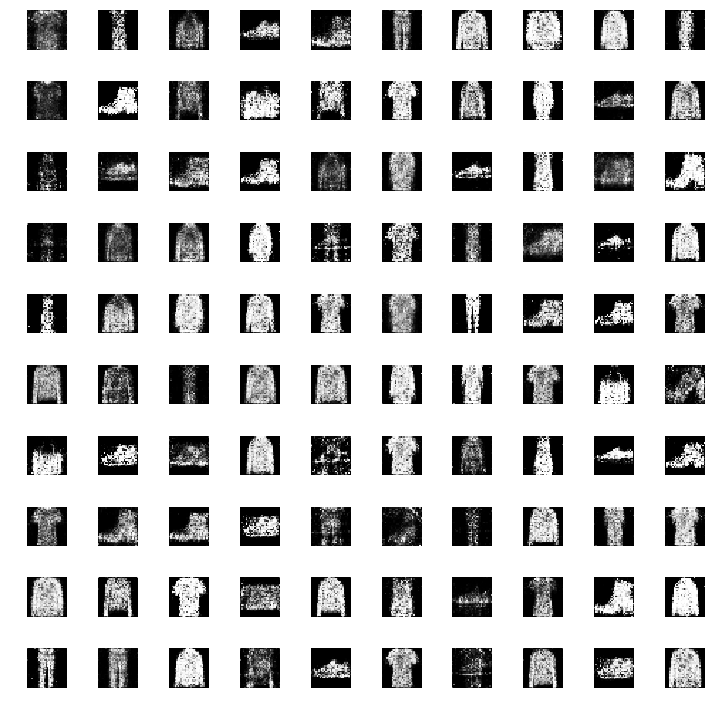

Epoch 21 Disc Loss 0.0029 Generator Loss 0.0040
Epoch 21 Disc Loss 0.0059 Generator Loss 0.0079
Epoch 21 Disc Loss 0.0087 Generator Loss 0.0118
Epoch 21 Disc Loss 0.0117 Generator Loss 0.0158
Epoch 21 Disc Loss 0.0146 Generator Loss 0.0198
Epoch 21 Disc Loss 0.0174 Generator Loss 0.0238
Epoch 21 Disc Loss 0.0204 Generator Loss 0.0278
Epoch 21 Disc Loss 0.0233 Generator Loss 0.0321
Epoch 21 Disc Loss 0.0262 Generator Loss 0.0362
Epoch 21 Disc Loss 0.0290 Generator Loss 0.0404
Epoch 21 Disc Loss 0.0320 Generator Loss 0.0445
Epoch 21 Disc Loss 0.0349 Generator Loss 0.0486
Epoch 21 Disc Loss 0.0378 Generator Loss 0.0525
Epoch 21 Disc Loss 0.0408 Generator Loss 0.0566
Epoch 21 Disc Loss 0.0437 Generator Loss 0.0606
Epoch 21 Disc Loss 0.0466 Generator Loss 0.0647
Epoch 21 Disc Loss 0.0496 Generator Loss 0.0688
Epoch 21 Disc Loss 0.0524 Generator Loss 0.0730
Epoch 21 Disc Loss 0.0553 Generator Loss 0.0771
Epoch 21 Disc Loss 0.0582 Generator Loss 0.0811
Epoch 21 Disc Loss 0.0611 Generator Loss

Epoch 21 Disc Loss 0.4974 Generator Loss 0.6984
Epoch 21 Disc Loss 0.5002 Generator Loss 0.7025
Epoch 21 Disc Loss 0.5032 Generator Loss 0.7066
Epoch 21 Disc Loss 0.5059 Generator Loss 0.7107
Epoch 21 Disc Loss 0.5087 Generator Loss 0.7150
Epoch 21 Disc Loss 0.5115 Generator Loss 0.7193
Epoch 21 Disc Loss 0.5146 Generator Loss 0.7234
Epoch 21 Disc Loss 0.5175 Generator Loss 0.7274
Epoch 21 Disc Loss 0.5203 Generator Loss 0.7314
Epoch 21 Disc Loss 0.5231 Generator Loss 0.7355
Epoch 21 Disc Loss 0.5261 Generator Loss 0.7395
Epoch 21 Disc Loss 0.5290 Generator Loss 0.7437
Epoch 21 Disc Loss 0.5319 Generator Loss 0.7480
Epoch 21 Disc Loss 0.5348 Generator Loss 0.7523
Epoch 21 Disc Loss 0.5377 Generator Loss 0.7565
Epoch 21 Disc Loss 0.5406 Generator Loss 0.7606
Epoch 21 Disc Loss 0.5436 Generator Loss 0.7645
Epoch 21 Disc Loss 0.5465 Generator Loss 0.7684
Epoch 21 Disc Loss 0.5493 Generator Loss 0.7724
Epoch 21 Disc Loss 0.5522 Generator Loss 0.7764
Epoch 21 Disc Loss 0.5551 Generator Loss

Epoch 22 Disc Loss 0.3165 Generator Loss 0.4468
Epoch 22 Disc Loss 0.3194 Generator Loss 0.4509
Epoch 22 Disc Loss 0.3224 Generator Loss 0.4551
Epoch 22 Disc Loss 0.3253 Generator Loss 0.4592
Epoch 22 Disc Loss 0.3282 Generator Loss 0.4634
Epoch 22 Disc Loss 0.3312 Generator Loss 0.4674
Epoch 22 Disc Loss 0.3341 Generator Loss 0.4714
Epoch 22 Disc Loss 0.3371 Generator Loss 0.4756
Epoch 22 Disc Loss 0.3400 Generator Loss 0.4797
Epoch 22 Disc Loss 0.3429 Generator Loss 0.4836
Epoch 22 Disc Loss 0.3458 Generator Loss 0.4877
Epoch 22 Disc Loss 0.3487 Generator Loss 0.4918
Epoch 22 Disc Loss 0.3517 Generator Loss 0.4959
Epoch 22 Disc Loss 0.3545 Generator Loss 0.5001
Epoch 22 Disc Loss 0.3573 Generator Loss 0.5042
Epoch 22 Disc Loss 0.3602 Generator Loss 0.5083
Epoch 22 Disc Loss 0.3630 Generator Loss 0.5123
Epoch 22 Disc Loss 0.3659 Generator Loss 0.5164
Epoch 22 Disc Loss 0.3688 Generator Loss 0.5204
Epoch 22 Disc Loss 0.3717 Generator Loss 0.5245
Epoch 22 Disc Loss 0.3746 Generator Loss

Epoch 23 Disc Loss 0.1325 Generator Loss 0.1871
Epoch 23 Disc Loss 0.1353 Generator Loss 0.1911
Epoch 23 Disc Loss 0.1382 Generator Loss 0.1951
Epoch 23 Disc Loss 0.1412 Generator Loss 0.1991
Epoch 23 Disc Loss 0.1440 Generator Loss 0.2031
Epoch 23 Disc Loss 0.1469 Generator Loss 0.2070
Epoch 23 Disc Loss 0.1498 Generator Loss 0.2109
Epoch 23 Disc Loss 0.1528 Generator Loss 0.2148
Epoch 23 Disc Loss 0.1556 Generator Loss 0.2190
Epoch 23 Disc Loss 0.1585 Generator Loss 0.2231
Epoch 23 Disc Loss 0.1615 Generator Loss 0.2271
Epoch 23 Disc Loss 0.1644 Generator Loss 0.2311
Epoch 23 Disc Loss 0.1673 Generator Loss 0.2351
Epoch 23 Disc Loss 0.1702 Generator Loss 0.2392
Epoch 23 Disc Loss 0.1731 Generator Loss 0.2434
Epoch 23 Disc Loss 0.1760 Generator Loss 0.2475
Epoch 23 Disc Loss 0.1789 Generator Loss 0.2514
Epoch 23 Disc Loss 0.1818 Generator Loss 0.2555
Epoch 23 Disc Loss 0.1846 Generator Loss 0.2596
Epoch 23 Disc Loss 0.1874 Generator Loss 0.2637
Epoch 23 Disc Loss 0.1903 Generator Loss

Epoch 23 Disc Loss 0.6288 Generator Loss 0.8837
Epoch 23 Disc Loss 0.6316 Generator Loss 0.8879
Epoch 23 Disc Loss 0.6345 Generator Loss 0.8920
Epoch 23 Disc Loss 0.6373 Generator Loss 0.8961
Epoch 23 Disc Loss 0.6402 Generator Loss 0.9002
Epoch 23 Disc Loss 0.6431 Generator Loss 0.9041
Epoch 23 Disc Loss 0.6460 Generator Loss 0.9081
Epoch 23 Disc Loss 0.6489 Generator Loss 0.9122
Epoch 23 Disc Loss 0.6517 Generator Loss 0.9162
Epoch 23 Disc Loss 0.6546 Generator Loss 0.9203
Epoch 23 Disc Loss 0.6575 Generator Loss 0.9243
Epoch 23 Disc Loss 0.6603 Generator Loss 0.9283
Epoch 23 Disc Loss 0.6631 Generator Loss 0.9323
Epoch 23 Disc Loss 0.6661 Generator Loss 0.9360
Epoch 23 Disc Loss 0.6690 Generator Loss 0.9399
Epoch 23 Disc Loss 0.6719 Generator Loss 0.9438
Epoch 23 Disc Loss 0.6748 Generator Loss 0.9478
Epoch 24 Disc Loss 0.0029 Generator Loss 0.0040
Epoch 24 Disc Loss 0.0058 Generator Loss 0.0079
Epoch 24 Disc Loss 0.0087 Generator Loss 0.0119
Epoch 24 Disc Loss 0.0115 Generator Loss

Epoch 24 Disc Loss 0.4478 Generator Loss 0.6243
Epoch 24 Disc Loss 0.4507 Generator Loss 0.6283
Epoch 24 Disc Loss 0.4536 Generator Loss 0.6324
Epoch 24 Disc Loss 0.4565 Generator Loss 0.6366
Epoch 24 Disc Loss 0.4594 Generator Loss 0.6407
Epoch 24 Disc Loss 0.4623 Generator Loss 0.6447
Epoch 24 Disc Loss 0.4653 Generator Loss 0.6487
Epoch 24 Disc Loss 0.4682 Generator Loss 0.6527
Epoch 24 Disc Loss 0.4709 Generator Loss 0.6570
Epoch 24 Disc Loss 0.4739 Generator Loss 0.6612
Epoch 24 Disc Loss 0.4768 Generator Loss 0.6654
Epoch 24 Disc Loss 0.4797 Generator Loss 0.6694
Epoch 24 Disc Loss 0.4826 Generator Loss 0.6734
Epoch 24 Disc Loss 0.4855 Generator Loss 0.6774
Epoch 24 Disc Loss 0.4885 Generator Loss 0.6815
Epoch 24 Disc Loss 0.4913 Generator Loss 0.6857
Epoch 24 Disc Loss 0.4943 Generator Loss 0.6897
Epoch 24 Disc Loss 0.4971 Generator Loss 0.6939
Epoch 24 Disc Loss 0.5000 Generator Loss 0.6979
Epoch 24 Disc Loss 0.5029 Generator Loss 0.7020
Epoch 24 Disc Loss 0.5059 Generator Loss

Epoch 25 Disc Loss 0.2688 Generator Loss 0.3728
Epoch 25 Disc Loss 0.2717 Generator Loss 0.3767
Epoch 25 Disc Loss 0.2746 Generator Loss 0.3808
Epoch 25 Disc Loss 0.2776 Generator Loss 0.3847
Epoch 25 Disc Loss 0.2805 Generator Loss 0.3887
Epoch 25 Disc Loss 0.2834 Generator Loss 0.3928
Epoch 25 Disc Loss 0.2862 Generator Loss 0.3969
Epoch 25 Disc Loss 0.2891 Generator Loss 0.4009
Epoch 25 Disc Loss 0.2920 Generator Loss 0.4049
Epoch 25 Disc Loss 0.2948 Generator Loss 0.4089
Epoch 25 Disc Loss 0.2978 Generator Loss 0.4128
Epoch 25 Disc Loss 0.3006 Generator Loss 0.4168
Epoch 25 Disc Loss 0.3035 Generator Loss 0.4207
Epoch 25 Disc Loss 0.3063 Generator Loss 0.4247
Epoch 25 Disc Loss 0.3092 Generator Loss 0.4286
Epoch 25 Disc Loss 0.3121 Generator Loss 0.4326
Epoch 25 Disc Loss 0.3150 Generator Loss 0.4366
Epoch 25 Disc Loss 0.3180 Generator Loss 0.4406
Epoch 25 Disc Loss 0.3208 Generator Loss 0.4447
Epoch 25 Disc Loss 0.3237 Generator Loss 0.4488
Epoch 25 Disc Loss 0.3266 Generator Loss

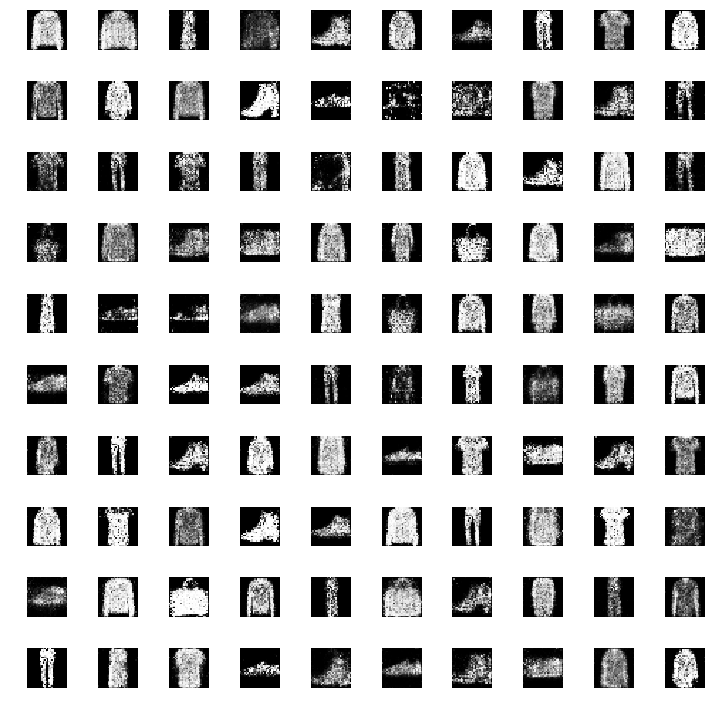

Epoch 26 Disc Loss 0.0029 Generator Loss 0.0040
Epoch 26 Disc Loss 0.0058 Generator Loss 0.0079
Epoch 26 Disc Loss 0.0088 Generator Loss 0.0119
Epoch 26 Disc Loss 0.0116 Generator Loss 0.0159
Epoch 26 Disc Loss 0.0146 Generator Loss 0.0200
Epoch 26 Disc Loss 0.0176 Generator Loss 0.0241
Epoch 26 Disc Loss 0.0205 Generator Loss 0.0280
Epoch 26 Disc Loss 0.0234 Generator Loss 0.0319
Epoch 26 Disc Loss 0.0264 Generator Loss 0.0356
Epoch 26 Disc Loss 0.0293 Generator Loss 0.0396
Epoch 26 Disc Loss 0.0323 Generator Loss 0.0436
Epoch 26 Disc Loss 0.0352 Generator Loss 0.0476
Epoch 26 Disc Loss 0.0380 Generator Loss 0.0515
Epoch 26 Disc Loss 0.0409 Generator Loss 0.0554
Epoch 26 Disc Loss 0.0438 Generator Loss 0.0593
Epoch 26 Disc Loss 0.0468 Generator Loss 0.0633
Epoch 26 Disc Loss 0.0497 Generator Loss 0.0674
Epoch 26 Disc Loss 0.0526 Generator Loss 0.0712
Epoch 26 Disc Loss 0.0555 Generator Loss 0.0751
Epoch 26 Disc Loss 0.0584 Generator Loss 0.0792
Epoch 26 Disc Loss 0.0612 Generator Loss

Epoch 26 Disc Loss 0.4969 Generator Loss 0.6811
Epoch 26 Disc Loss 0.4998 Generator Loss 0.6851
Epoch 26 Disc Loss 0.5027 Generator Loss 0.6890
Epoch 26 Disc Loss 0.5056 Generator Loss 0.6931
Epoch 26 Disc Loss 0.5085 Generator Loss 0.6971
Epoch 26 Disc Loss 0.5114 Generator Loss 0.7011
Epoch 26 Disc Loss 0.5144 Generator Loss 0.7051
Epoch 26 Disc Loss 0.5172 Generator Loss 0.7092
Epoch 26 Disc Loss 0.5201 Generator Loss 0.7132
Epoch 26 Disc Loss 0.5231 Generator Loss 0.7172
Epoch 26 Disc Loss 0.5259 Generator Loss 0.7212
Epoch 26 Disc Loss 0.5288 Generator Loss 0.7253
Epoch 26 Disc Loss 0.5317 Generator Loss 0.7293
Epoch 26 Disc Loss 0.5347 Generator Loss 0.7332
Epoch 26 Disc Loss 0.5377 Generator Loss 0.7372
Epoch 26 Disc Loss 0.5406 Generator Loss 0.7412
Epoch 26 Disc Loss 0.5434 Generator Loss 0.7453
Epoch 26 Disc Loss 0.5463 Generator Loss 0.7493
Epoch 26 Disc Loss 0.5492 Generator Loss 0.7533
Epoch 26 Disc Loss 0.5521 Generator Loss 0.7572
Epoch 26 Disc Loss 0.5550 Generator Loss

Epoch 27 Disc Loss 0.3137 Generator Loss 0.4344
Epoch 27 Disc Loss 0.3167 Generator Loss 0.4383
Epoch 27 Disc Loss 0.3197 Generator Loss 0.4423
Epoch 27 Disc Loss 0.3225 Generator Loss 0.4462
Epoch 27 Disc Loss 0.3254 Generator Loss 0.4502
Epoch 27 Disc Loss 0.3284 Generator Loss 0.4541
Epoch 27 Disc Loss 0.3314 Generator Loss 0.4581
Epoch 27 Disc Loss 0.3343 Generator Loss 0.4620
Epoch 27 Disc Loss 0.3371 Generator Loss 0.4659
Epoch 27 Disc Loss 0.3400 Generator Loss 0.4699
Epoch 27 Disc Loss 0.3429 Generator Loss 0.4738
Epoch 27 Disc Loss 0.3458 Generator Loss 0.4779
Epoch 27 Disc Loss 0.3487 Generator Loss 0.4819
Epoch 27 Disc Loss 0.3517 Generator Loss 0.4858
Epoch 27 Disc Loss 0.3545 Generator Loss 0.4897
Epoch 27 Disc Loss 0.3574 Generator Loss 0.4938
Epoch 27 Disc Loss 0.3604 Generator Loss 0.4978
Epoch 27 Disc Loss 0.3633 Generator Loss 0.5018
Epoch 27 Disc Loss 0.3661 Generator Loss 0.5057
Epoch 27 Disc Loss 0.3691 Generator Loss 0.5097
Epoch 27 Disc Loss 0.3719 Generator Loss

Epoch 28 Disc Loss 0.1336 Generator Loss 0.1859
Epoch 28 Disc Loss 0.1366 Generator Loss 0.1899
Epoch 28 Disc Loss 0.1395 Generator Loss 0.1939
Epoch 28 Disc Loss 0.1424 Generator Loss 0.1978
Epoch 28 Disc Loss 0.1454 Generator Loss 0.2017
Epoch 28 Disc Loss 0.1482 Generator Loss 0.2057
Epoch 28 Disc Loss 0.1511 Generator Loss 0.2097
Epoch 28 Disc Loss 0.1541 Generator Loss 0.2137
Epoch 28 Disc Loss 0.1570 Generator Loss 0.2177
Epoch 28 Disc Loss 0.1599 Generator Loss 0.2216
Epoch 28 Disc Loss 0.1629 Generator Loss 0.2258
Epoch 28 Disc Loss 0.1658 Generator Loss 0.2298
Epoch 28 Disc Loss 0.1686 Generator Loss 0.2340
Epoch 28 Disc Loss 0.1714 Generator Loss 0.2381
Epoch 28 Disc Loss 0.1744 Generator Loss 0.2422
Epoch 28 Disc Loss 0.1773 Generator Loss 0.2464
Epoch 28 Disc Loss 0.1802 Generator Loss 0.2504
Epoch 28 Disc Loss 0.1831 Generator Loss 0.2544
Epoch 28 Disc Loss 0.1860 Generator Loss 0.2584
Epoch 28 Disc Loss 0.1889 Generator Loss 0.2624
Epoch 28 Disc Loss 0.1917 Generator Loss

Epoch 28 Disc Loss 0.6292 Generator Loss 0.8680
Epoch 28 Disc Loss 0.6320 Generator Loss 0.8720
Epoch 28 Disc Loss 0.6349 Generator Loss 0.8762
Epoch 28 Disc Loss 0.6378 Generator Loss 0.8802
Epoch 28 Disc Loss 0.6407 Generator Loss 0.8841
Epoch 28 Disc Loss 0.6436 Generator Loss 0.8880
Epoch 28 Disc Loss 0.6466 Generator Loss 0.8919
Epoch 28 Disc Loss 0.6495 Generator Loss 0.8958
Epoch 28 Disc Loss 0.6524 Generator Loss 0.8997
Epoch 28 Disc Loss 0.6553 Generator Loss 0.9035
Epoch 28 Disc Loss 0.6582 Generator Loss 0.9073
Epoch 28 Disc Loss 0.6611 Generator Loss 0.9111
Epoch 28 Disc Loss 0.6639 Generator Loss 0.9151
Epoch 28 Disc Loss 0.6668 Generator Loss 0.9191
Epoch 28 Disc Loss 0.6697 Generator Loss 0.9230
Epoch 28 Disc Loss 0.6726 Generator Loss 0.9269
Epoch 28 Disc Loss 0.6755 Generator Loss 0.9309
Epoch 28 Disc Loss 0.6784 Generator Loss 0.9347
Epoch 28 Disc Loss 0.6813 Generator Loss 0.9385
Epoch 29 Disc Loss 0.0029 Generator Loss 0.0039
Epoch 29 Disc Loss 0.0057 Generator Loss

Epoch 29 Disc Loss 0.4498 Generator Loss 0.6101
Epoch 29 Disc Loss 0.4527 Generator Loss 0.6141
Epoch 29 Disc Loss 0.4555 Generator Loss 0.6182
Epoch 29 Disc Loss 0.4585 Generator Loss 0.6224
Epoch 29 Disc Loss 0.4614 Generator Loss 0.6264
Epoch 29 Disc Loss 0.4643 Generator Loss 0.6303
Epoch 29 Disc Loss 0.4672 Generator Loss 0.6342
Epoch 29 Disc Loss 0.4701 Generator Loss 0.6383
Epoch 29 Disc Loss 0.4730 Generator Loss 0.6424
Epoch 29 Disc Loss 0.4759 Generator Loss 0.6464
Epoch 29 Disc Loss 0.4788 Generator Loss 0.6504
Epoch 29 Disc Loss 0.4817 Generator Loss 0.6543
Epoch 29 Disc Loss 0.4846 Generator Loss 0.6584
Epoch 29 Disc Loss 0.4875 Generator Loss 0.6624
Epoch 29 Disc Loss 0.4902 Generator Loss 0.6664
Epoch 29 Disc Loss 0.4931 Generator Loss 0.6703
Epoch 29 Disc Loss 0.4961 Generator Loss 0.6742
Epoch 29 Disc Loss 0.4990 Generator Loss 0.6782
Epoch 29 Disc Loss 0.5019 Generator Loss 0.6822
Epoch 29 Disc Loss 0.5048 Generator Loss 0.6863
Epoch 29 Disc Loss 0.5077 Generator Loss

Epoch 30 Disc Loss 0.2651 Generator Loss 0.3632
Epoch 30 Disc Loss 0.2680 Generator Loss 0.3671
Epoch 30 Disc Loss 0.2709 Generator Loss 0.3711
Epoch 30 Disc Loss 0.2737 Generator Loss 0.3750
Epoch 30 Disc Loss 0.2766 Generator Loss 0.3790
Epoch 30 Disc Loss 0.2796 Generator Loss 0.3830
Epoch 30 Disc Loss 0.2826 Generator Loss 0.3870
Epoch 30 Disc Loss 0.2855 Generator Loss 0.3912
Epoch 30 Disc Loss 0.2883 Generator Loss 0.3953
Epoch 30 Disc Loss 0.2912 Generator Loss 0.3994
Epoch 30 Disc Loss 0.2941 Generator Loss 0.4032
Epoch 30 Disc Loss 0.2970 Generator Loss 0.4072
Epoch 30 Disc Loss 0.3001 Generator Loss 0.4111
Epoch 30 Disc Loss 0.3030 Generator Loss 0.4150
Epoch 30 Disc Loss 0.3059 Generator Loss 0.4190
Epoch 30 Disc Loss 0.3088 Generator Loss 0.4230
Epoch 30 Disc Loss 0.3117 Generator Loss 0.4270
Epoch 30 Disc Loss 0.3146 Generator Loss 0.4309
Epoch 30 Disc Loss 0.3176 Generator Loss 0.4349
Epoch 30 Disc Loss 0.3205 Generator Loss 0.4388
Epoch 30 Disc Loss 0.3235 Generator Loss

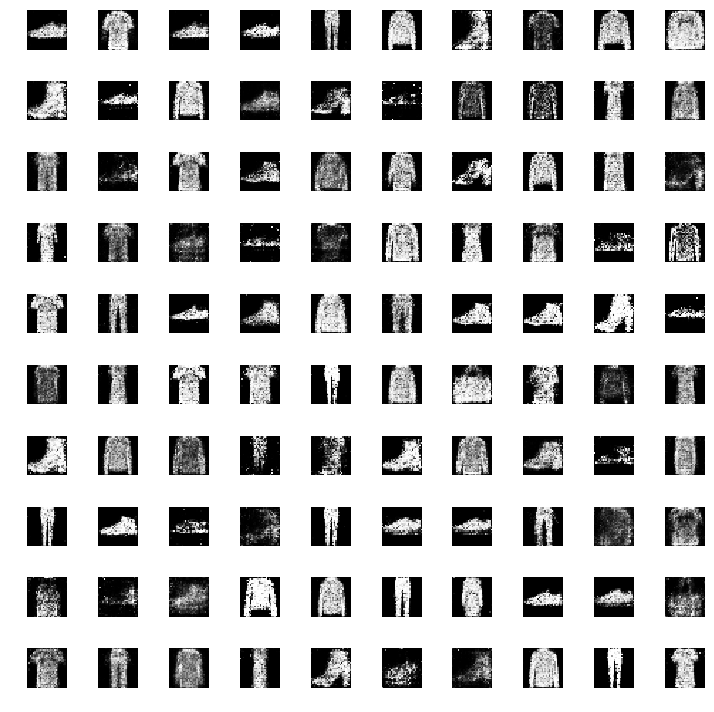

Epoch 31 Disc Loss 0.0030 Generator Loss 0.0040
Epoch 31 Disc Loss 0.0059 Generator Loss 0.0081
Epoch 31 Disc Loss 0.0088 Generator Loss 0.0120
Epoch 31 Disc Loss 0.0118 Generator Loss 0.0159
Epoch 31 Disc Loss 0.0147 Generator Loss 0.0196
Epoch 31 Disc Loss 0.0176 Generator Loss 0.0234
Epoch 31 Disc Loss 0.0205 Generator Loss 0.0274
Epoch 31 Disc Loss 0.0234 Generator Loss 0.0313
Epoch 31 Disc Loss 0.0263 Generator Loss 0.0353
Epoch 31 Disc Loss 0.0292 Generator Loss 0.0393
Epoch 31 Disc Loss 0.0320 Generator Loss 0.0433
Epoch 31 Disc Loss 0.0350 Generator Loss 0.0471
Epoch 31 Disc Loss 0.0378 Generator Loss 0.0510
Epoch 31 Disc Loss 0.0408 Generator Loss 0.0548
Epoch 31 Disc Loss 0.0437 Generator Loss 0.0587
Epoch 31 Disc Loss 0.0466 Generator Loss 0.0626
Epoch 31 Disc Loss 0.0495 Generator Loss 0.0665
Epoch 31 Disc Loss 0.0524 Generator Loss 0.0704
Epoch 31 Disc Loss 0.0553 Generator Loss 0.0744
Epoch 31 Disc Loss 0.0582 Generator Loss 0.0783
Epoch 31 Disc Loss 0.0612 Generator Loss

Epoch 31 Disc Loss 0.5021 Generator Loss 0.6774
Epoch 31 Disc Loss 0.5050 Generator Loss 0.6814
Epoch 31 Disc Loss 0.5079 Generator Loss 0.6856
Epoch 31 Disc Loss 0.5109 Generator Loss 0.6896
Epoch 31 Disc Loss 0.5138 Generator Loss 0.6936
Epoch 31 Disc Loss 0.5167 Generator Loss 0.6976
Epoch 31 Disc Loss 0.5196 Generator Loss 0.7016
Epoch 31 Disc Loss 0.5226 Generator Loss 0.7055
Epoch 31 Disc Loss 0.5254 Generator Loss 0.7095
Epoch 31 Disc Loss 0.5284 Generator Loss 0.7134
Epoch 31 Disc Loss 0.5312 Generator Loss 0.7173
Epoch 31 Disc Loss 0.5341 Generator Loss 0.7214
Epoch 31 Disc Loss 0.5371 Generator Loss 0.7254
Epoch 31 Disc Loss 0.5400 Generator Loss 0.7294
Epoch 31 Disc Loss 0.5428 Generator Loss 0.7335
Epoch 31 Disc Loss 0.5457 Generator Loss 0.7375
Epoch 31 Disc Loss 0.5487 Generator Loss 0.7415
Epoch 31 Disc Loss 0.5516 Generator Loss 0.7455
Epoch 31 Disc Loss 0.5544 Generator Loss 0.7493
Epoch 31 Disc Loss 0.5574 Generator Loss 0.7532
Epoch 31 Disc Loss 0.5603 Generator Loss

Epoch 32 Disc Loss 0.3182 Generator Loss 0.4294
Epoch 32 Disc Loss 0.3211 Generator Loss 0.4333
Epoch 32 Disc Loss 0.3241 Generator Loss 0.4372
Epoch 32 Disc Loss 0.3270 Generator Loss 0.4412
Epoch 32 Disc Loss 0.3299 Generator Loss 0.4452
Epoch 32 Disc Loss 0.3328 Generator Loss 0.4492
Epoch 32 Disc Loss 0.3357 Generator Loss 0.4531
Epoch 32 Disc Loss 0.3387 Generator Loss 0.4568
Epoch 32 Disc Loss 0.3417 Generator Loss 0.4608
Epoch 32 Disc Loss 0.3446 Generator Loss 0.4648
Epoch 32 Disc Loss 0.3475 Generator Loss 0.4688
Epoch 32 Disc Loss 0.3504 Generator Loss 0.4729
Epoch 32 Disc Loss 0.3533 Generator Loss 0.4769
Epoch 32 Disc Loss 0.3563 Generator Loss 0.4808
Epoch 32 Disc Loss 0.3592 Generator Loss 0.4846
Epoch 32 Disc Loss 0.3621 Generator Loss 0.4886
Epoch 32 Disc Loss 0.3650 Generator Loss 0.4925
Epoch 32 Disc Loss 0.3679 Generator Loss 0.4965
Epoch 32 Disc Loss 0.3708 Generator Loss 0.5004
Epoch 32 Disc Loss 0.3737 Generator Loss 0.5043
Epoch 32 Disc Loss 0.3766 Generator Loss

Epoch 33 Disc Loss 0.1370 Generator Loss 0.1871
Epoch 33 Disc Loss 0.1400 Generator Loss 0.1910
Epoch 33 Disc Loss 0.1429 Generator Loss 0.1950
Epoch 33 Disc Loss 0.1458 Generator Loss 0.1992
Epoch 33 Disc Loss 0.1486 Generator Loss 0.2031
Epoch 33 Disc Loss 0.1516 Generator Loss 0.2069
Epoch 33 Disc Loss 0.1544 Generator Loss 0.2108
Epoch 33 Disc Loss 0.1573 Generator Loss 0.2147
Epoch 33 Disc Loss 0.1602 Generator Loss 0.2186
Epoch 33 Disc Loss 0.1632 Generator Loss 0.2225
Epoch 33 Disc Loss 0.1662 Generator Loss 0.2264
Epoch 33 Disc Loss 0.1692 Generator Loss 0.2304
Epoch 33 Disc Loss 0.1721 Generator Loss 0.2345
Epoch 33 Disc Loss 0.1750 Generator Loss 0.2385
Epoch 33 Disc Loss 0.1779 Generator Loss 0.2425
Epoch 33 Disc Loss 0.1809 Generator Loss 0.2464
Epoch 33 Disc Loss 0.1838 Generator Loss 0.2502
Epoch 33 Disc Loss 0.1868 Generator Loss 0.2540
Epoch 33 Disc Loss 0.1898 Generator Loss 0.2579
Epoch 33 Disc Loss 0.1927 Generator Loss 0.2618
Epoch 33 Disc Loss 0.1957 Generator Loss

Epoch 33 Disc Loss 0.6361 Generator Loss 0.8553
Epoch 33 Disc Loss 0.6391 Generator Loss 0.8592
Epoch 33 Disc Loss 0.6420 Generator Loss 0.8632
Epoch 33 Disc Loss 0.6449 Generator Loss 0.8671
Epoch 33 Disc Loss 0.6478 Generator Loss 0.8710
Epoch 33 Disc Loss 0.6507 Generator Loss 0.8749
Epoch 33 Disc Loss 0.6536 Generator Loss 0.8787
Epoch 33 Disc Loss 0.6566 Generator Loss 0.8827
Epoch 33 Disc Loss 0.6594 Generator Loss 0.8866
Epoch 33 Disc Loss 0.6624 Generator Loss 0.8905
Epoch 33 Disc Loss 0.6653 Generator Loss 0.8944
Epoch 33 Disc Loss 0.6683 Generator Loss 0.8982
Epoch 33 Disc Loss 0.6713 Generator Loss 0.9021
Epoch 33 Disc Loss 0.6743 Generator Loss 0.9059
Epoch 33 Disc Loss 0.6772 Generator Loss 0.9099
Epoch 33 Disc Loss 0.6801 Generator Loss 0.9139
Epoch 33 Disc Loss 0.6830 Generator Loss 0.9178
Epoch 34 Disc Loss 0.0029 Generator Loss 0.0039
Epoch 34 Disc Loss 0.0058 Generator Loss 0.0078
Epoch 34 Disc Loss 0.0087 Generator Loss 0.0117
Epoch 34 Disc Loss 0.0117 Generator Loss

Epoch 34 Disc Loss 0.4539 Generator Loss 0.6089
Epoch 34 Disc Loss 0.4568 Generator Loss 0.6129
Epoch 34 Disc Loss 0.4598 Generator Loss 0.6168
Epoch 34 Disc Loss 0.4627 Generator Loss 0.6208
Epoch 34 Disc Loss 0.4657 Generator Loss 0.6247
Epoch 34 Disc Loss 0.4686 Generator Loss 0.6286
Epoch 34 Disc Loss 0.4716 Generator Loss 0.6325
Epoch 34 Disc Loss 0.4745 Generator Loss 0.6364
Epoch 34 Disc Loss 0.4775 Generator Loss 0.6402
Epoch 34 Disc Loss 0.4804 Generator Loss 0.6441
Epoch 34 Disc Loss 0.4834 Generator Loss 0.6480
Epoch 34 Disc Loss 0.4863 Generator Loss 0.6519
Epoch 34 Disc Loss 0.4892 Generator Loss 0.6559
Epoch 34 Disc Loss 0.4921 Generator Loss 0.6599
Epoch 34 Disc Loss 0.4950 Generator Loss 0.6637
Epoch 34 Disc Loss 0.4979 Generator Loss 0.6676
Epoch 34 Disc Loss 0.5008 Generator Loss 0.6715
Epoch 34 Disc Loss 0.5037 Generator Loss 0.6754
Epoch 34 Disc Loss 0.5066 Generator Loss 0.6794
Epoch 34 Disc Loss 0.5095 Generator Loss 0.6833
Epoch 34 Disc Loss 0.5124 Generator Loss

Epoch 35 Disc Loss 0.2718 Generator Loss 0.3649
Epoch 35 Disc Loss 0.2747 Generator Loss 0.3688
Epoch 35 Disc Loss 0.2775 Generator Loss 0.3727
Epoch 35 Disc Loss 0.2805 Generator Loss 0.3765
Epoch 35 Disc Loss 0.2835 Generator Loss 0.3804
Epoch 35 Disc Loss 0.2864 Generator Loss 0.3843
Epoch 35 Disc Loss 0.2893 Generator Loss 0.3882
Epoch 35 Disc Loss 0.2921 Generator Loss 0.3922
Epoch 35 Disc Loss 0.2951 Generator Loss 0.3960
Epoch 35 Disc Loss 0.2980 Generator Loss 0.3998
Epoch 35 Disc Loss 0.3009 Generator Loss 0.4038
Epoch 35 Disc Loss 0.3038 Generator Loss 0.4077
Epoch 35 Disc Loss 0.3068 Generator Loss 0.4116
Epoch 35 Disc Loss 0.3097 Generator Loss 0.4155
Epoch 35 Disc Loss 0.3127 Generator Loss 0.4195
Epoch 35 Disc Loss 0.3156 Generator Loss 0.4235
Epoch 35 Disc Loss 0.3185 Generator Loss 0.4274
Epoch 35 Disc Loss 0.3214 Generator Loss 0.4312
Epoch 35 Disc Loss 0.3244 Generator Loss 0.4351
Epoch 35 Disc Loss 0.3273 Generator Loss 0.4390
Epoch 35 Disc Loss 0.3302 Generator Loss

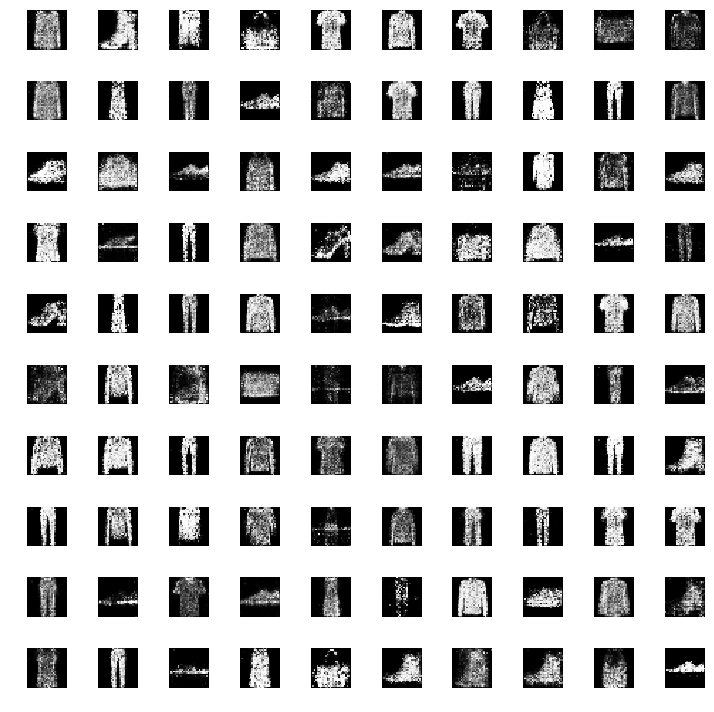

Epoch 36 Disc Loss 0.0029 Generator Loss 0.0038
Epoch 36 Disc Loss 0.0057 Generator Loss 0.0076
Epoch 36 Disc Loss 0.0086 Generator Loss 0.0114
Epoch 36 Disc Loss 0.0116 Generator Loss 0.0153
Epoch 36 Disc Loss 0.0145 Generator Loss 0.0192
Epoch 36 Disc Loss 0.0175 Generator Loss 0.0230
Epoch 36 Disc Loss 0.0204 Generator Loss 0.0269
Epoch 36 Disc Loss 0.0233 Generator Loss 0.0308
Epoch 36 Disc Loss 0.0262 Generator Loss 0.0346
Epoch 36 Disc Loss 0.0292 Generator Loss 0.0385
Epoch 36 Disc Loss 0.0322 Generator Loss 0.0424
Epoch 36 Disc Loss 0.0350 Generator Loss 0.0463
Epoch 36 Disc Loss 0.0380 Generator Loss 0.0501
Epoch 36 Disc Loss 0.0408 Generator Loss 0.0540
Epoch 36 Disc Loss 0.0438 Generator Loss 0.0579
Epoch 36 Disc Loss 0.0467 Generator Loss 0.0618
Epoch 36 Disc Loss 0.0496 Generator Loss 0.0656
Epoch 36 Disc Loss 0.0527 Generator Loss 0.0696
Epoch 36 Disc Loss 0.0556 Generator Loss 0.0736
Epoch 36 Disc Loss 0.0586 Generator Loss 0.0775
Epoch 36 Disc Loss 0.0615 Generator Loss

Epoch 36 Disc Loss 0.4998 Generator Loss 0.6726
Epoch 36 Disc Loss 0.5027 Generator Loss 0.6766
Epoch 36 Disc Loss 0.5056 Generator Loss 0.6805
Epoch 36 Disc Loss 0.5086 Generator Loss 0.6844
Epoch 36 Disc Loss 0.5115 Generator Loss 0.6883
Epoch 36 Disc Loss 0.5145 Generator Loss 0.6921
Epoch 36 Disc Loss 0.5173 Generator Loss 0.6960
Epoch 36 Disc Loss 0.5202 Generator Loss 0.6999
Epoch 36 Disc Loss 0.5231 Generator Loss 0.7037
Epoch 36 Disc Loss 0.5261 Generator Loss 0.7076
Epoch 36 Disc Loss 0.5289 Generator Loss 0.7115
Epoch 36 Disc Loss 0.5319 Generator Loss 0.7153
Epoch 36 Disc Loss 0.5347 Generator Loss 0.7193
Epoch 36 Disc Loss 0.5376 Generator Loss 0.7232
Epoch 36 Disc Loss 0.5406 Generator Loss 0.7271
Epoch 36 Disc Loss 0.5435 Generator Loss 0.7313
Epoch 36 Disc Loss 0.5464 Generator Loss 0.7352
Epoch 36 Disc Loss 0.5494 Generator Loss 0.7392
Epoch 36 Disc Loss 0.5524 Generator Loss 0.7432
Epoch 36 Disc Loss 0.5554 Generator Loss 0.7470
Epoch 36 Disc Loss 0.5583 Generator Loss

Epoch 37 Disc Loss 0.3159 Generator Loss 0.4183
Epoch 37 Disc Loss 0.3189 Generator Loss 0.4223
Epoch 37 Disc Loss 0.3218 Generator Loss 0.4264
Epoch 37 Disc Loss 0.3248 Generator Loss 0.4305
Epoch 37 Disc Loss 0.3277 Generator Loss 0.4346
Epoch 37 Disc Loss 0.3307 Generator Loss 0.4386
Epoch 37 Disc Loss 0.3337 Generator Loss 0.4425
Epoch 37 Disc Loss 0.3366 Generator Loss 0.4464
Epoch 37 Disc Loss 0.3395 Generator Loss 0.4505
Epoch 37 Disc Loss 0.3424 Generator Loss 0.4545
Epoch 37 Disc Loss 0.3453 Generator Loss 0.4584
Epoch 37 Disc Loss 0.3483 Generator Loss 0.4624
Epoch 37 Disc Loss 0.3512 Generator Loss 0.4662
Epoch 37 Disc Loss 0.3541 Generator Loss 0.4701
Epoch 37 Disc Loss 0.3570 Generator Loss 0.4740
Epoch 37 Disc Loss 0.3599 Generator Loss 0.4779
Epoch 37 Disc Loss 0.3629 Generator Loss 0.4818
Epoch 37 Disc Loss 0.3659 Generator Loss 0.4858
Epoch 37 Disc Loss 0.3688 Generator Loss 0.4898
Epoch 37 Disc Loss 0.3719 Generator Loss 0.4937
Epoch 37 Disc Loss 0.3748 Generator Loss

Epoch 38 Disc Loss 0.1315 Generator Loss 0.1750
Epoch 38 Disc Loss 0.1344 Generator Loss 0.1789
Epoch 38 Disc Loss 0.1374 Generator Loss 0.1827
Epoch 38 Disc Loss 0.1403 Generator Loss 0.1867
Epoch 38 Disc Loss 0.1433 Generator Loss 0.1906
Epoch 38 Disc Loss 0.1463 Generator Loss 0.1946
Epoch 38 Disc Loss 0.1492 Generator Loss 0.1987
Epoch 38 Disc Loss 0.1521 Generator Loss 0.2026
Epoch 38 Disc Loss 0.1550 Generator Loss 0.2066
Epoch 38 Disc Loss 0.1579 Generator Loss 0.2104
Epoch 38 Disc Loss 0.1609 Generator Loss 0.2142
Epoch 38 Disc Loss 0.1638 Generator Loss 0.2179
Epoch 38 Disc Loss 0.1668 Generator Loss 0.2218
Epoch 38 Disc Loss 0.1697 Generator Loss 0.2257
Epoch 38 Disc Loss 0.1726 Generator Loss 0.2296
Epoch 38 Disc Loss 0.1756 Generator Loss 0.2335
Epoch 38 Disc Loss 0.1785 Generator Loss 0.2374
Epoch 38 Disc Loss 0.1814 Generator Loss 0.2413
Epoch 38 Disc Loss 0.1843 Generator Loss 0.2452
Epoch 38 Disc Loss 0.1872 Generator Loss 0.2491
Epoch 38 Disc Loss 0.1902 Generator Loss

Epoch 38 Disc Loss 0.6326 Generator Loss 0.8383
Epoch 38 Disc Loss 0.6355 Generator Loss 0.8423
Epoch 38 Disc Loss 0.6385 Generator Loss 0.8462
Epoch 38 Disc Loss 0.6415 Generator Loss 0.8500
Epoch 38 Disc Loss 0.6444 Generator Loss 0.8539
Epoch 38 Disc Loss 0.6474 Generator Loss 0.8580
Epoch 38 Disc Loss 0.6503 Generator Loss 0.8619
Epoch 38 Disc Loss 0.6532 Generator Loss 0.8659
Epoch 38 Disc Loss 0.6560 Generator Loss 0.8699
Epoch 38 Disc Loss 0.6589 Generator Loss 0.8737
Epoch 38 Disc Loss 0.6619 Generator Loss 0.8776
Epoch 38 Disc Loss 0.6648 Generator Loss 0.8815
Epoch 38 Disc Loss 0.6677 Generator Loss 0.8855
Epoch 38 Disc Loss 0.6707 Generator Loss 0.8894
Epoch 38 Disc Loss 0.6736 Generator Loss 0.8933
Epoch 38 Disc Loss 0.6766 Generator Loss 0.8972
Epoch 38 Disc Loss 0.6795 Generator Loss 0.9011
Epoch 38 Disc Loss 0.6823 Generator Loss 0.9051
Epoch 38 Disc Loss 0.6852 Generator Loss 0.9092
Epoch 39 Disc Loss 0.0029 Generator Loss 0.0039
Epoch 39 Disc Loss 0.0059 Generator Loss

Epoch 39 Disc Loss 0.4447 Generator Loss 0.5892
Epoch 39 Disc Loss 0.4475 Generator Loss 0.5929
Epoch 39 Disc Loss 0.4505 Generator Loss 0.5969
Epoch 39 Disc Loss 0.4534 Generator Loss 0.6008
Epoch 39 Disc Loss 0.4563 Generator Loss 0.6047
Epoch 39 Disc Loss 0.4593 Generator Loss 0.6087
Epoch 39 Disc Loss 0.4622 Generator Loss 0.6125
Epoch 39 Disc Loss 0.4651 Generator Loss 0.6165
Epoch 39 Disc Loss 0.4681 Generator Loss 0.6203
Epoch 39 Disc Loss 0.4710 Generator Loss 0.6240
Epoch 39 Disc Loss 0.4739 Generator Loss 0.6279
Epoch 39 Disc Loss 0.4768 Generator Loss 0.6318
Epoch 39 Disc Loss 0.4797 Generator Loss 0.6357
Epoch 39 Disc Loss 0.4827 Generator Loss 0.6395
Epoch 39 Disc Loss 0.4855 Generator Loss 0.6434
Epoch 39 Disc Loss 0.4885 Generator Loss 0.6473
Epoch 39 Disc Loss 0.4914 Generator Loss 0.6514
Epoch 39 Disc Loss 0.4943 Generator Loss 0.6553
Epoch 39 Disc Loss 0.4973 Generator Loss 0.6593
Epoch 39 Disc Loss 0.5004 Generator Loss 0.6630
Epoch 39 Disc Loss 0.5033 Generator Loss

Epoch 40 Disc Loss 0.2644 Generator Loss 0.3509
Epoch 40 Disc Loss 0.2673 Generator Loss 0.3548
Epoch 40 Disc Loss 0.2704 Generator Loss 0.3587
Epoch 40 Disc Loss 0.2733 Generator Loss 0.3626
Epoch 40 Disc Loss 0.2761 Generator Loss 0.3666
Epoch 40 Disc Loss 0.2791 Generator Loss 0.3704
Epoch 40 Disc Loss 0.2820 Generator Loss 0.3742
Epoch 40 Disc Loss 0.2849 Generator Loss 0.3780
Epoch 40 Disc Loss 0.2879 Generator Loss 0.3818
Epoch 40 Disc Loss 0.2908 Generator Loss 0.3856
Epoch 40 Disc Loss 0.2938 Generator Loss 0.3894
Epoch 40 Disc Loss 0.2968 Generator Loss 0.3933
Epoch 40 Disc Loss 0.2997 Generator Loss 0.3973
Epoch 40 Disc Loss 0.3026 Generator Loss 0.4012
Epoch 40 Disc Loss 0.3054 Generator Loss 0.4052
Epoch 40 Disc Loss 0.3083 Generator Loss 0.4090
Epoch 40 Disc Loss 0.3113 Generator Loss 0.4130
Epoch 40 Disc Loss 0.3142 Generator Loss 0.4169
Epoch 40 Disc Loss 0.3171 Generator Loss 0.4209
Epoch 40 Disc Loss 0.3200 Generator Loss 0.4247
Epoch 40 Disc Loss 0.3229 Generator Loss

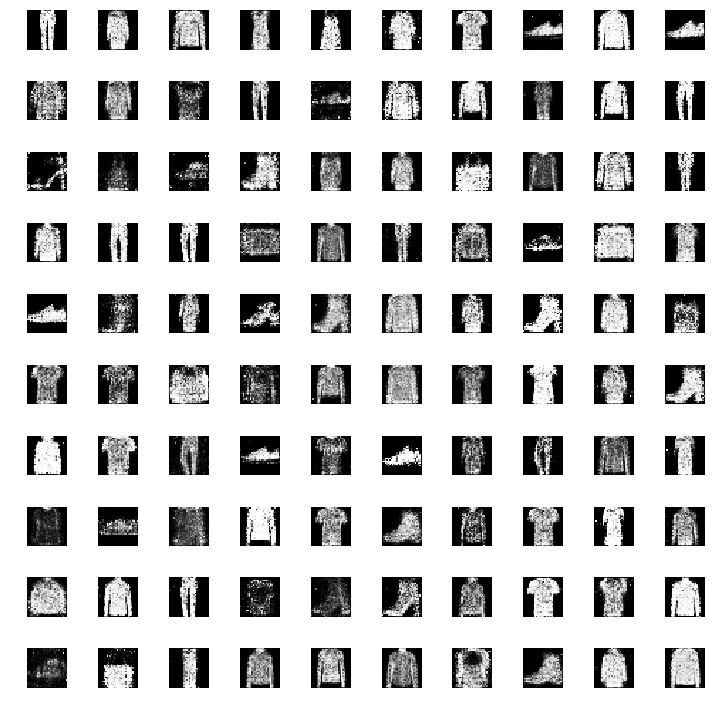

Epoch 41 Disc Loss 0.0029 Generator Loss 0.0041
Epoch 41 Disc Loss 0.0058 Generator Loss 0.0080
Epoch 41 Disc Loss 0.0088 Generator Loss 0.0119
Epoch 41 Disc Loss 0.0117 Generator Loss 0.0157
Epoch 41 Disc Loss 0.0146 Generator Loss 0.0195
Epoch 41 Disc Loss 0.0175 Generator Loss 0.0233
Epoch 41 Disc Loss 0.0205 Generator Loss 0.0272
Epoch 41 Disc Loss 0.0234 Generator Loss 0.0311
Epoch 41 Disc Loss 0.0262 Generator Loss 0.0349
Epoch 41 Disc Loss 0.0292 Generator Loss 0.0388
Epoch 41 Disc Loss 0.0322 Generator Loss 0.0427
Epoch 41 Disc Loss 0.0350 Generator Loss 0.0468
Epoch 41 Disc Loss 0.0380 Generator Loss 0.0506
Epoch 41 Disc Loss 0.0409 Generator Loss 0.0545
Epoch 41 Disc Loss 0.0438 Generator Loss 0.0582
Epoch 41 Disc Loss 0.0468 Generator Loss 0.0619
Epoch 41 Disc Loss 0.0498 Generator Loss 0.0658
Epoch 41 Disc Loss 0.0527 Generator Loss 0.0696
Epoch 41 Disc Loss 0.0556 Generator Loss 0.0735
Epoch 41 Disc Loss 0.0585 Generator Loss 0.0774
Epoch 41 Disc Loss 0.0614 Generator Loss

Epoch 41 Disc Loss 0.5039 Generator Loss 0.6674
Epoch 41 Disc Loss 0.5069 Generator Loss 0.6710
Epoch 41 Disc Loss 0.5098 Generator Loss 0.6749
Epoch 41 Disc Loss 0.5127 Generator Loss 0.6789
Epoch 41 Disc Loss 0.5157 Generator Loss 0.6829
Epoch 41 Disc Loss 0.5186 Generator Loss 0.6867
Epoch 41 Disc Loss 0.5215 Generator Loss 0.6905
Epoch 41 Disc Loss 0.5244 Generator Loss 0.6943
Epoch 41 Disc Loss 0.5274 Generator Loss 0.6981
Epoch 41 Disc Loss 0.5303 Generator Loss 0.7018
Epoch 41 Disc Loss 0.5333 Generator Loss 0.7057
Epoch 41 Disc Loss 0.5362 Generator Loss 0.7095
Epoch 41 Disc Loss 0.5391 Generator Loss 0.7134
Epoch 41 Disc Loss 0.5421 Generator Loss 0.7172
Epoch 41 Disc Loss 0.5451 Generator Loss 0.7211
Epoch 41 Disc Loss 0.5480 Generator Loss 0.7249
Epoch 41 Disc Loss 0.5509 Generator Loss 0.7288
Epoch 41 Disc Loss 0.5539 Generator Loss 0.7327
Epoch 41 Disc Loss 0.5568 Generator Loss 0.7367
Epoch 41 Disc Loss 0.5598 Generator Loss 0.7406
Epoch 41 Disc Loss 0.5628 Generator Loss

Epoch 42 Disc Loss 0.3166 Generator Loss 0.4178
Epoch 42 Disc Loss 0.3196 Generator Loss 0.4217
Epoch 42 Disc Loss 0.3225 Generator Loss 0.4256
Epoch 42 Disc Loss 0.3255 Generator Loss 0.4294
Epoch 42 Disc Loss 0.3285 Generator Loss 0.4333
Epoch 42 Disc Loss 0.3314 Generator Loss 0.4371
Epoch 42 Disc Loss 0.3343 Generator Loss 0.4409
Epoch 42 Disc Loss 0.3373 Generator Loss 0.4447
Epoch 42 Disc Loss 0.3402 Generator Loss 0.4485
Epoch 42 Disc Loss 0.3432 Generator Loss 0.4524
Epoch 42 Disc Loss 0.3461 Generator Loss 0.4562
Epoch 42 Disc Loss 0.3491 Generator Loss 0.4600
Epoch 42 Disc Loss 0.3519 Generator Loss 0.4639
Epoch 42 Disc Loss 0.3548 Generator Loss 0.4678
Epoch 42 Disc Loss 0.3577 Generator Loss 0.4716
Epoch 42 Disc Loss 0.3606 Generator Loss 0.4755
Epoch 42 Disc Loss 0.3636 Generator Loss 0.4793
Epoch 42 Disc Loss 0.3666 Generator Loss 0.4831
Epoch 42 Disc Loss 0.3696 Generator Loss 0.4869
Epoch 42 Disc Loss 0.3725 Generator Loss 0.4909
Epoch 42 Disc Loss 0.3754 Generator Loss

Epoch 43 Disc Loss 0.1345 Generator Loss 0.1775
Epoch 43 Disc Loss 0.1374 Generator Loss 0.1816
Epoch 43 Disc Loss 0.1403 Generator Loss 0.1856
Epoch 43 Disc Loss 0.1433 Generator Loss 0.1894
Epoch 43 Disc Loss 0.1463 Generator Loss 0.1932
Epoch 43 Disc Loss 0.1492 Generator Loss 0.1971
Epoch 43 Disc Loss 0.1522 Generator Loss 0.2010
Epoch 43 Disc Loss 0.1551 Generator Loss 0.2049
Epoch 43 Disc Loss 0.1580 Generator Loss 0.2087
Epoch 43 Disc Loss 0.1609 Generator Loss 0.2126
Epoch 43 Disc Loss 0.1638 Generator Loss 0.2164
Epoch 43 Disc Loss 0.1667 Generator Loss 0.2204
Epoch 43 Disc Loss 0.1696 Generator Loss 0.2243
Epoch 43 Disc Loss 0.1726 Generator Loss 0.2281
Epoch 43 Disc Loss 0.1755 Generator Loss 0.2319
Epoch 43 Disc Loss 0.1784 Generator Loss 0.2357
Epoch 43 Disc Loss 0.1813 Generator Loss 0.2396
Epoch 43 Disc Loss 0.1843 Generator Loss 0.2436
Epoch 43 Disc Loss 0.1872 Generator Loss 0.2475
Epoch 43 Disc Loss 0.1901 Generator Loss 0.2514
Epoch 43 Disc Loss 0.1930 Generator Loss

Epoch 43 Disc Loss 0.6365 Generator Loss 0.8373
Epoch 43 Disc Loss 0.6395 Generator Loss 0.8412
Epoch 43 Disc Loss 0.6424 Generator Loss 0.8450
Epoch 43 Disc Loss 0.6454 Generator Loss 0.8488
Epoch 43 Disc Loss 0.6484 Generator Loss 0.8527
Epoch 43 Disc Loss 0.6513 Generator Loss 0.8566
Epoch 43 Disc Loss 0.6542 Generator Loss 0.8607
Epoch 43 Disc Loss 0.6571 Generator Loss 0.8647
Epoch 43 Disc Loss 0.6601 Generator Loss 0.8686
Epoch 43 Disc Loss 0.6630 Generator Loss 0.8726
Epoch 43 Disc Loss 0.6659 Generator Loss 0.8765
Epoch 43 Disc Loss 0.6689 Generator Loss 0.8804
Epoch 43 Disc Loss 0.6718 Generator Loss 0.8843
Epoch 43 Disc Loss 0.6748 Generator Loss 0.8882
Epoch 43 Disc Loss 0.6777 Generator Loss 0.8920
Epoch 43 Disc Loss 0.6806 Generator Loss 0.8960
Epoch 43 Disc Loss 0.6834 Generator Loss 0.8999
Epoch 43 Disc Loss 0.6863 Generator Loss 0.9037
Epoch 44 Disc Loss 0.0029 Generator Loss 0.0039
Epoch 44 Disc Loss 0.0058 Generator Loss 0.0079
Epoch 44 Disc Loss 0.0087 Generator Loss

Epoch 44 Disc Loss 0.4550 Generator Loss 0.5970
Epoch 44 Disc Loss 0.4579 Generator Loss 0.6009
Epoch 44 Disc Loss 0.4609 Generator Loss 0.6048
Epoch 44 Disc Loss 0.4638 Generator Loss 0.6087
Epoch 44 Disc Loss 0.4668 Generator Loss 0.6125
Epoch 44 Disc Loss 0.4697 Generator Loss 0.6164
Epoch 44 Disc Loss 0.4727 Generator Loss 0.6202
Epoch 44 Disc Loss 0.4756 Generator Loss 0.6241
Epoch 44 Disc Loss 0.4786 Generator Loss 0.6280
Epoch 44 Disc Loss 0.4814 Generator Loss 0.6319
Epoch 44 Disc Loss 0.4843 Generator Loss 0.6358
Epoch 44 Disc Loss 0.4873 Generator Loss 0.6396
Epoch 44 Disc Loss 0.4902 Generator Loss 0.6434
Epoch 44 Disc Loss 0.4932 Generator Loss 0.6472
Epoch 44 Disc Loss 0.4961 Generator Loss 0.6509
Epoch 44 Disc Loss 0.4991 Generator Loss 0.6548
Epoch 44 Disc Loss 0.5020 Generator Loss 0.6588
Epoch 44 Disc Loss 0.5049 Generator Loss 0.6627
Epoch 44 Disc Loss 0.5077 Generator Loss 0.6665
Epoch 44 Disc Loss 0.5107 Generator Loss 0.6703
Epoch 44 Disc Loss 0.5136 Generator Loss

Epoch 45 Disc Loss 0.2735 Generator Loss 0.3569
Epoch 45 Disc Loss 0.2764 Generator Loss 0.3608
Epoch 45 Disc Loss 0.2795 Generator Loss 0.3648
Epoch 45 Disc Loss 0.2824 Generator Loss 0.3687
Epoch 45 Disc Loss 0.2854 Generator Loss 0.3727
Epoch 45 Disc Loss 0.2883 Generator Loss 0.3766
Epoch 45 Disc Loss 0.2913 Generator Loss 0.3805
Epoch 45 Disc Loss 0.2942 Generator Loss 0.3844
Epoch 45 Disc Loss 0.2972 Generator Loss 0.3883
Epoch 45 Disc Loss 0.3001 Generator Loss 0.3923
Epoch 45 Disc Loss 0.3031 Generator Loss 0.3963
Epoch 45 Disc Loss 0.3060 Generator Loss 0.4001
Epoch 45 Disc Loss 0.3089 Generator Loss 0.4039
Epoch 45 Disc Loss 0.3119 Generator Loss 0.4078
Epoch 45 Disc Loss 0.3148 Generator Loss 0.4116
Epoch 45 Disc Loss 0.3177 Generator Loss 0.4153
Epoch 45 Disc Loss 0.3207 Generator Loss 0.4192
Epoch 45 Disc Loss 0.3236 Generator Loss 0.4230
Epoch 45 Disc Loss 0.3266 Generator Loss 0.4269
Epoch 45 Disc Loss 0.3295 Generator Loss 0.4308
Epoch 45 Disc Loss 0.3324 Generator Loss

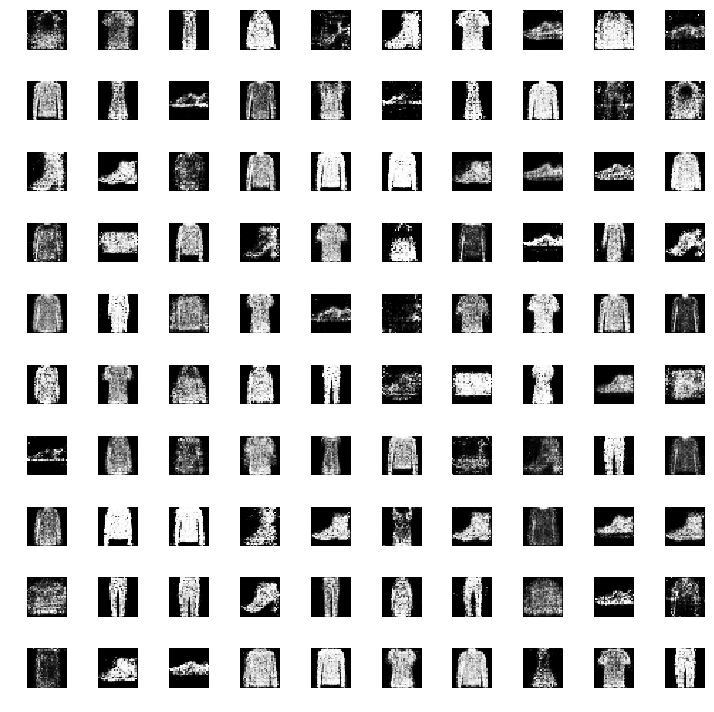

Epoch 46 Disc Loss 0.0029 Generator Loss 0.0040
Epoch 46 Disc Loss 0.0058 Generator Loss 0.0080
Epoch 46 Disc Loss 0.0088 Generator Loss 0.0118
Epoch 46 Disc Loss 0.0117 Generator Loss 0.0157
Epoch 46 Disc Loss 0.0146 Generator Loss 0.0196
Epoch 46 Disc Loss 0.0175 Generator Loss 0.0235
Epoch 46 Disc Loss 0.0205 Generator Loss 0.0274
Epoch 46 Disc Loss 0.0233 Generator Loss 0.0314
Epoch 46 Disc Loss 0.0263 Generator Loss 0.0352
Epoch 46 Disc Loss 0.0292 Generator Loss 0.0390
Epoch 46 Disc Loss 0.0321 Generator Loss 0.0429
Epoch 46 Disc Loss 0.0351 Generator Loss 0.0467
Epoch 46 Disc Loss 0.0380 Generator Loss 0.0506
Epoch 46 Disc Loss 0.0409 Generator Loss 0.0545
Epoch 46 Disc Loss 0.0438 Generator Loss 0.0584
Epoch 46 Disc Loss 0.0467 Generator Loss 0.0623
Epoch 46 Disc Loss 0.0496 Generator Loss 0.0663
Epoch 46 Disc Loss 0.0525 Generator Loss 0.0702
Epoch 46 Disc Loss 0.0554 Generator Loss 0.0741
Epoch 46 Disc Loss 0.0583 Generator Loss 0.0779
Epoch 46 Disc Loss 0.0613 Generator Loss

Epoch 46 Disc Loss 0.5039 Generator Loss 0.6644
Epoch 46 Disc Loss 0.5068 Generator Loss 0.6682
Epoch 46 Disc Loss 0.5097 Generator Loss 0.6721
Epoch 46 Disc Loss 0.5126 Generator Loss 0.6760
Epoch 46 Disc Loss 0.5156 Generator Loss 0.6799
Epoch 46 Disc Loss 0.5185 Generator Loss 0.6838
Epoch 46 Disc Loss 0.5215 Generator Loss 0.6875
Epoch 46 Disc Loss 0.5244 Generator Loss 0.6913
Epoch 46 Disc Loss 0.5274 Generator Loss 0.6951
Epoch 46 Disc Loss 0.5303 Generator Loss 0.6989
Epoch 46 Disc Loss 0.5332 Generator Loss 0.7027
Epoch 46 Disc Loss 0.5362 Generator Loss 0.7065
Epoch 46 Disc Loss 0.5392 Generator Loss 0.7102
Epoch 46 Disc Loss 0.5421 Generator Loss 0.7139
Epoch 46 Disc Loss 0.5451 Generator Loss 0.7176
Epoch 46 Disc Loss 0.5480 Generator Loss 0.7214
Epoch 46 Disc Loss 0.5509 Generator Loss 0.7252
Epoch 46 Disc Loss 0.5539 Generator Loss 0.7289
Epoch 46 Disc Loss 0.5568 Generator Loss 0.7327
Epoch 46 Disc Loss 0.5597 Generator Loss 0.7366
Epoch 46 Disc Loss 0.5626 Generator Loss

Epoch 47 Disc Loss 0.3191 Generator Loss 0.4205
Epoch 47 Disc Loss 0.3221 Generator Loss 0.4244
Epoch 47 Disc Loss 0.3249 Generator Loss 0.4283
Epoch 47 Disc Loss 0.3278 Generator Loss 0.4322
Epoch 47 Disc Loss 0.3307 Generator Loss 0.4361
Epoch 47 Disc Loss 0.3337 Generator Loss 0.4398
Epoch 47 Disc Loss 0.3367 Generator Loss 0.4436
Epoch 47 Disc Loss 0.3396 Generator Loss 0.4475
Epoch 47 Disc Loss 0.3426 Generator Loss 0.4513
Epoch 47 Disc Loss 0.3455 Generator Loss 0.4553
Epoch 47 Disc Loss 0.3485 Generator Loss 0.4591
Epoch 47 Disc Loss 0.3515 Generator Loss 0.4629
Epoch 47 Disc Loss 0.3544 Generator Loss 0.4668
Epoch 47 Disc Loss 0.3574 Generator Loss 0.4705
Epoch 47 Disc Loss 0.3603 Generator Loss 0.4743
Epoch 47 Disc Loss 0.3632 Generator Loss 0.4782
Epoch 47 Disc Loss 0.3661 Generator Loss 0.4821
Epoch 47 Disc Loss 0.3690 Generator Loss 0.4858
Epoch 47 Disc Loss 0.3719 Generator Loss 0.4896
Epoch 47 Disc Loss 0.3748 Generator Loss 0.4932
Epoch 47 Disc Loss 0.3778 Generator Loss

Epoch 48 Disc Loss 0.1351 Generator Loss 0.1760
Epoch 48 Disc Loss 0.1380 Generator Loss 0.1799
Epoch 48 Disc Loss 0.1409 Generator Loss 0.1838
Epoch 48 Disc Loss 0.1439 Generator Loss 0.1876
Epoch 48 Disc Loss 0.1468 Generator Loss 0.1915
Epoch 48 Disc Loss 0.1498 Generator Loss 0.1953
Epoch 48 Disc Loss 0.1528 Generator Loss 0.1990
Epoch 48 Disc Loss 0.1558 Generator Loss 0.2029
Epoch 48 Disc Loss 0.1587 Generator Loss 0.2067
Epoch 48 Disc Loss 0.1617 Generator Loss 0.2104
Epoch 48 Disc Loss 0.1647 Generator Loss 0.2142
Epoch 48 Disc Loss 0.1676 Generator Loss 0.2181
Epoch 48 Disc Loss 0.1706 Generator Loss 0.2220
Epoch 48 Disc Loss 0.1735 Generator Loss 0.2257
Epoch 48 Disc Loss 0.1765 Generator Loss 0.2295
Epoch 48 Disc Loss 0.1794 Generator Loss 0.2333
Epoch 48 Disc Loss 0.1823 Generator Loss 0.2372
Epoch 48 Disc Loss 0.1852 Generator Loss 0.2411
Epoch 48 Disc Loss 0.1881 Generator Loss 0.2450
Epoch 48 Disc Loss 0.1911 Generator Loss 0.2488
Epoch 48 Disc Loss 0.1940 Generator Loss

Epoch 48 Disc Loss 0.6364 Generator Loss 0.8370
Epoch 48 Disc Loss 0.6393 Generator Loss 0.8408
Epoch 48 Disc Loss 0.6423 Generator Loss 0.8445
Epoch 48 Disc Loss 0.6452 Generator Loss 0.8484
Epoch 48 Disc Loss 0.6480 Generator Loss 0.8523
Epoch 48 Disc Loss 0.6509 Generator Loss 0.8562
Epoch 48 Disc Loss 0.6538 Generator Loss 0.8599
Epoch 48 Disc Loss 0.6567 Generator Loss 0.8636
Epoch 48 Disc Loss 0.6597 Generator Loss 0.8673
Epoch 48 Disc Loss 0.6627 Generator Loss 0.8711
Epoch 48 Disc Loss 0.6657 Generator Loss 0.8748
Epoch 48 Disc Loss 0.6687 Generator Loss 0.8787
Epoch 48 Disc Loss 0.6717 Generator Loss 0.8827
Epoch 48 Disc Loss 0.6747 Generator Loss 0.8865
Epoch 48 Disc Loss 0.6776 Generator Loss 0.8905
Epoch 48 Disc Loss 0.6806 Generator Loss 0.8943
Epoch 48 Disc Loss 0.6835 Generator Loss 0.8981
Epoch 48 Disc Loss 0.6865 Generator Loss 0.9018
Epoch 49 Disc Loss 0.0029 Generator Loss 0.0038
Epoch 49 Disc Loss 0.0059 Generator Loss 0.0077
Epoch 49 Disc Loss 0.0088 Generator Loss

Epoch 49 Disc Loss 0.4552 Generator Loss 0.5977
Epoch 49 Disc Loss 0.4581 Generator Loss 0.6018
Epoch 49 Disc Loss 0.4611 Generator Loss 0.6058
Epoch 49 Disc Loss 0.4640 Generator Loss 0.6097
Epoch 49 Disc Loss 0.4670 Generator Loss 0.6135
Epoch 49 Disc Loss 0.4699 Generator Loss 0.6174
Epoch 49 Disc Loss 0.4728 Generator Loss 0.6212
Epoch 49 Disc Loss 0.4757 Generator Loss 0.6251
Epoch 49 Disc Loss 0.4786 Generator Loss 0.6290
Epoch 49 Disc Loss 0.4816 Generator Loss 0.6328
Epoch 49 Disc Loss 0.4845 Generator Loss 0.6367
Epoch 49 Disc Loss 0.4874 Generator Loss 0.6405
Epoch 49 Disc Loss 0.4903 Generator Loss 0.6443
Epoch 49 Disc Loss 0.4933 Generator Loss 0.6482
Epoch 49 Disc Loss 0.4962 Generator Loss 0.6522
Epoch 49 Disc Loss 0.4990 Generator Loss 0.6562
Epoch 49 Disc Loss 0.5019 Generator Loss 0.6601
Epoch 49 Disc Loss 0.5048 Generator Loss 0.6640
Epoch 49 Disc Loss 0.5077 Generator Loss 0.6679
Epoch 49 Disc Loss 0.5107 Generator Loss 0.6718
Epoch 49 Disc Loss 0.5135 Generator Loss

Epoch 50 Disc Loss 0.2734 Generator Loss 0.3540
Epoch 50 Disc Loss 0.2763 Generator Loss 0.3580
Epoch 50 Disc Loss 0.2792 Generator Loss 0.3619
Epoch 50 Disc Loss 0.2821 Generator Loss 0.3658
Epoch 50 Disc Loss 0.2851 Generator Loss 0.3696
Epoch 50 Disc Loss 0.2881 Generator Loss 0.3735
Epoch 50 Disc Loss 0.2911 Generator Loss 0.3772
Epoch 50 Disc Loss 0.2939 Generator Loss 0.3812
Epoch 50 Disc Loss 0.2968 Generator Loss 0.3852
Epoch 50 Disc Loss 0.2997 Generator Loss 0.3891
Epoch 50 Disc Loss 0.3027 Generator Loss 0.3929
Epoch 50 Disc Loss 0.3056 Generator Loss 0.3968
Epoch 50 Disc Loss 0.3086 Generator Loss 0.4007
Epoch 50 Disc Loss 0.3114 Generator Loss 0.4047
Epoch 50 Disc Loss 0.3143 Generator Loss 0.4086
Epoch 50 Disc Loss 0.3173 Generator Loss 0.4123
Epoch 50 Disc Loss 0.3202 Generator Loss 0.4161
Epoch 50 Disc Loss 0.3231 Generator Loss 0.4199
Epoch 50 Disc Loss 0.3260 Generator Loss 0.4238
Epoch 50 Disc Loss 0.3289 Generator Loss 0.4277
Epoch 50 Disc Loss 0.3317 Generator Loss

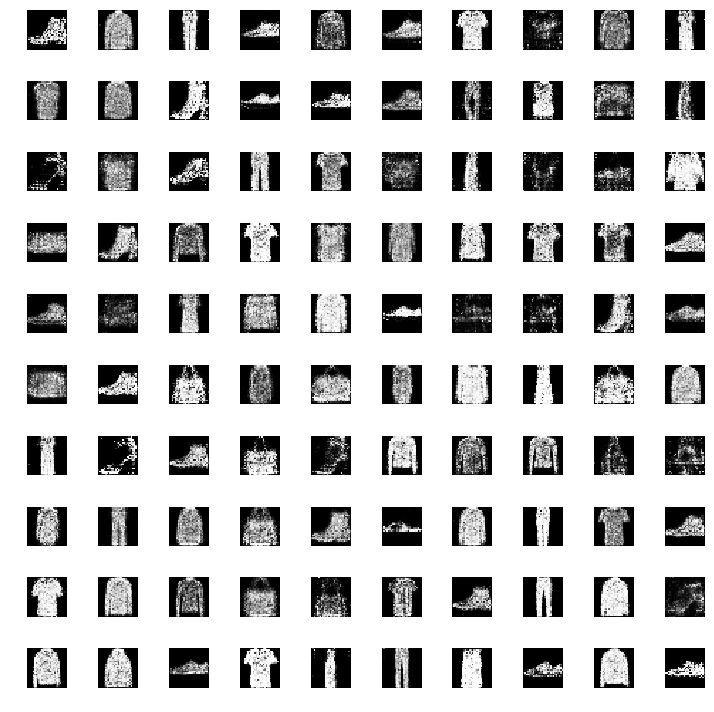

In [60]:
#training the GAN
d_losses = []
g_losses = []
for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0
    epoch_g_loss = 0
    #mini batch stochastic gradient descent
    for step in range(NO_OF_BATCHES):
        #first we train discriminator
        
        #50% real data and 50% fake data
        idx = np.random.randint(0,x_train.shape[0],HALF_BATCH)
        real_imgs = x_train[idx]
       
        #Fake Data X
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        # Labels 
        real_y = np.ones((HALF_BATCH,1))*0.9 #One Side Label Smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Train our Discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        # Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        
        print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
        d_losses.append(epoch_d_loss/NO_OF_BATCHES)
        g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (epoch+1)%5==0:
        generator.save('gan_generator_{0}.hdf5'.format(epoch+1))
        save_imgs(epoch)
   

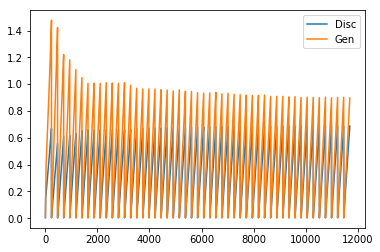

In [62]:
#plotting the loss
plt.plot(d_losses,label="Disc")
plt.plot(g_losses,label="Gen")
plt.legend()
plt.show()